In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator
import juliet


ERROR:   Could not load MultiNest library "libmultinest.so"
ERROR:   You have to build it first,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: https://johannesbuchner.github.io/PyMultiNest/install.html


ERROR:   Could not load MultiNest library: libmultinest.so
ERROR:   You have to build MultiNest,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: https://johannesbuchner.github.io/PyMultiNest/install.html

problem: libmultinest.so: cannot open shared object file: No such file or directory


In [2]:
from astropy.timeseries import LombScargle
import seaborn as sns
import pandas as pd
import lightkurve as lk
import copy
%matplotlib inline
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.time import Time

### HD 55496 | TIC 99242079 | 	TYC 6524-876-1

In [3]:
tic_id = 99242079
id = 'TIC99242079'

In [4]:
# TJD = BJD - 2,457,000

search_result = lk.search_lightcurve('TIC {}'.format(tic_id))
print(search_result)

SearchResult containing 5 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 07 2019               QLP    1800    99242079      0.0
  1 TESS Sector 33 2020               QLP     600    99242079      0.0
  2 TESS Sector 34 2021               QLP     600    99242079      0.0
  3 TESS Sector 07 2019 GSFC-ELEANOR-LITE    1800    99242079      0.0
  4 TESS Sector 07 2019              TGLC    1800    99242079      0.0


**Autor: QLP**

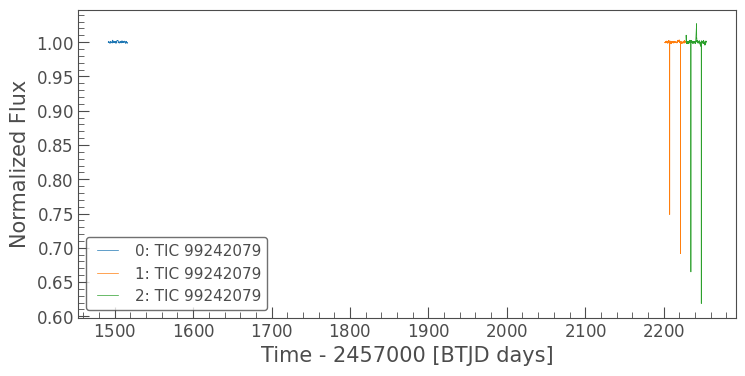

In [5]:
search_result = lk.search_lightcurve(id, author = 'QLP')
lc_collection = search_result.download_all()
lc_collection.plot();

(0.998, 1.003)

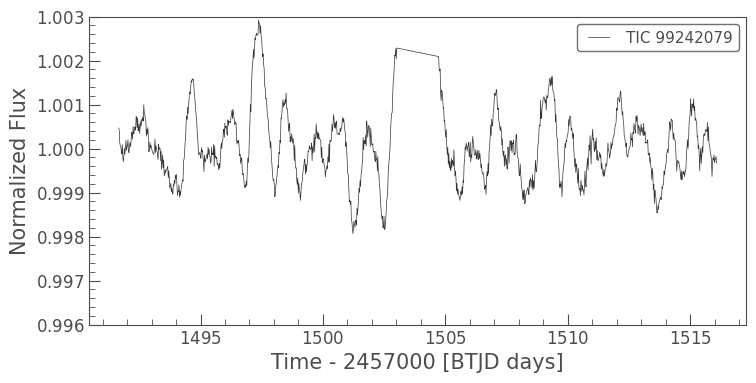

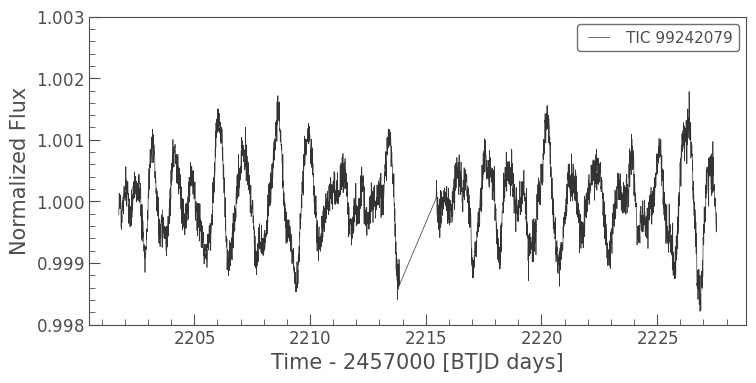

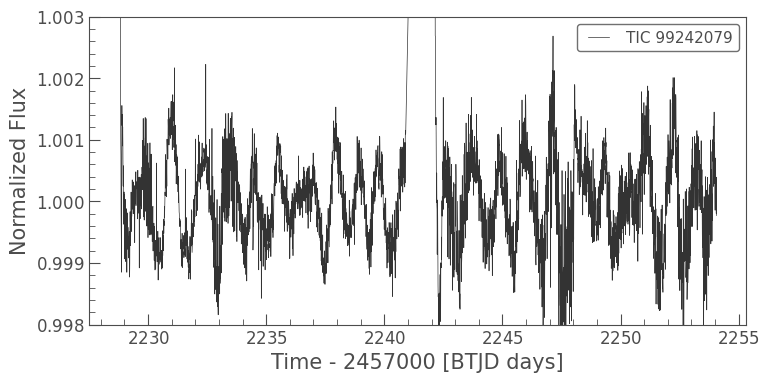

In [6]:
lc1 = lc_collection[0].flatten(window_length=361).remove_outliers(sigma = 30)
lc1.plot();
plt.ylim(0.996,1.003)
#plt.xlim(2530,2535)

lc2 = lc_collection[1].flatten(window_length=361).remove_outliers(sigma = 30)
lc2.plot();
plt.ylim(0.998,1.003)
#plt.xlim(2555,2560)

#plt.ylim(0.998,1.003)
lc3 = lc_collection[2].flatten(window_length=361).remove_outliers(sigma = 30)
lc3.plot();
plt.ylim(0.998,1.003)

In [7]:
df_filtrado1 = lc1[lc1['time'] < Time(1503,format='btjd', scale='tdb')]
df_filtrado1

<TessLightCurve length=542 LABEL="TIC 99242079" SECTOR=7 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
       time               flux        ... kspsap_flux_sml kspsap_flux_lag
                                      ...                                
       Time             float64       ...     float32         float32    
------------------ ------------------ ... --------------- ---------------
1491.6608239550549 1.0004678339977577 ...       1.0001001      0.99989635
1491.6816575415335 1.0004022442198413 ...       1.0001515       1.0001045
1491.7024911278354  1.000126230508954 ...        0.999982       1.0001436
1491.7233247138302 1.0000645761177125 ...       1.0000075      0.99986607
1491.7441582995486 1.0000448395572665 ...       1.0000492       0.9998779
1491.7649918848647 0.9999496151251459 ...       0.9999807       1.0007302
               ...                ... ...             ...             ...
 1502.890002362816 1.0016035888358663 ...      0.99985814      0.99972117
 1502.910835443528 1.0018826707303152 ...       0.9999403       1.0000813
1502.9316685226704 1.0021195685980198 ...       1.0000509       1.0003277
1502.9525016004031  1.002103958124846 ...       0.9999442       0.9996017
1502.9733346765815 1.0022684043307981 ...       1.0000505        1.000431
1502.9941677513634  1.002036749675457 ...       0.9998744       0.9990606

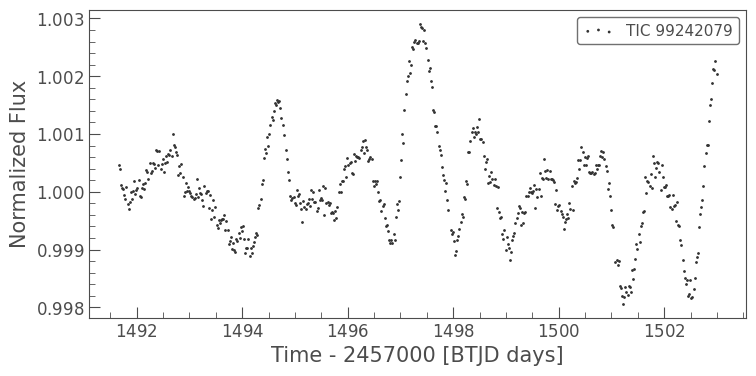

In [8]:
df_filtrado1.scatter();

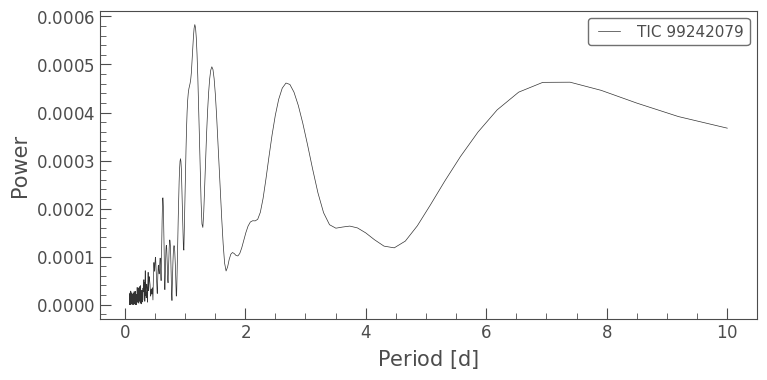

In [9]:
pg1 = df_filtrado1.to_periodogram(minimum_period=0.08*u.day, maximum_period=10*u.day, oversample_factor=10)
pg1.plot();

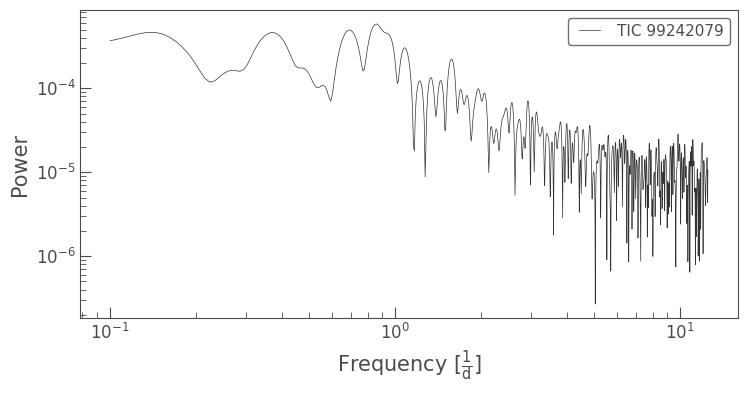

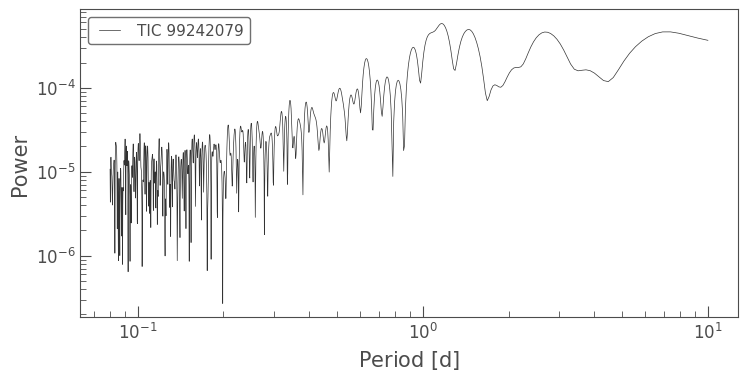

In [10]:
pg1.plot(view='frequency', scale='log');
pg1.plot(view='period', scale='log');

In [11]:
pg1.period_at_max_power

<Quantity 1.16438451 d>

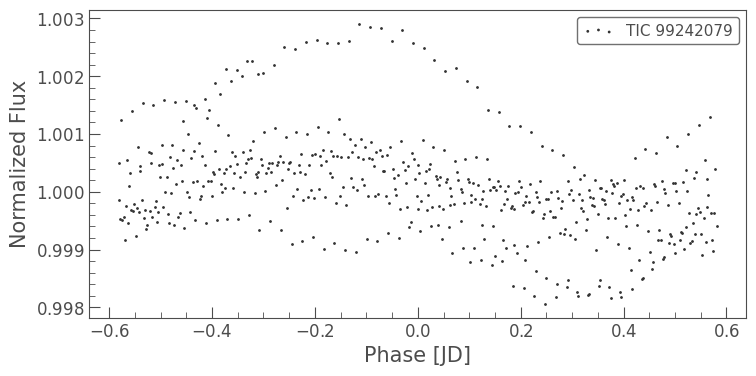

In [12]:
df_filtrado1.fold(period=pg1.period_at_max_power).scatter();

In [13]:
lc2['time']

<Time object: scale='tdb' format='btjd' value=[2201.73648916 2201.74343386 2201.75037856 ... 2227.55636887 2227.56331328
 2227.57025769]>

In [14]:
df_filtrado2 = lc2[lc2['time'] < Time(2213,format='btjd', scale='tdb')]
df_filtrado2

<TessLightCurve length=1615 LABEL="TIC 99242079" SECTOR=33 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
       time               flux        ... kspsap_flux_sml kspsap_flux_lag
                                      ...                                
       Time             float64       ...     float32         float32    
------------------ ------------------ ... --------------- ---------------
  2201.73648916494 0.9997804901329985 ...      0.99991554       0.9999397
 2201.743433863863 0.9998602520221644 ...      0.99994755       1.0003368
 2201.750378562785 0.9999784405624581 ...       1.0000874       1.0000019
2201.7573232615796 1.0001310018477534 ...        1.000211       1.0003531
2201.7642679602623 0.9998904738123722 ...       1.0000151       0.9997018
 2201.771212658945 1.0001046858663092 ...       1.0002056       1.0003885
               ...                ... ...             ...             ...
2212.9590041641627 1.0002749394536838 ...       1.0001639        1.000033
2212.9659487115373 1.0003323233790544 ...       1.0001754       1.0007955
 2212.972893258553 1.0002465060381163 ...       1.0001415       1.0000031
2212.9798378055666 1.0002889423255026 ...       1.0001636       0.9999974
2212.9867823525838 1.0002032626786672 ...          1.0001       1.0001194
2212.9937268995996 1.0002805344989014 ...       1.0001081       1.0005851

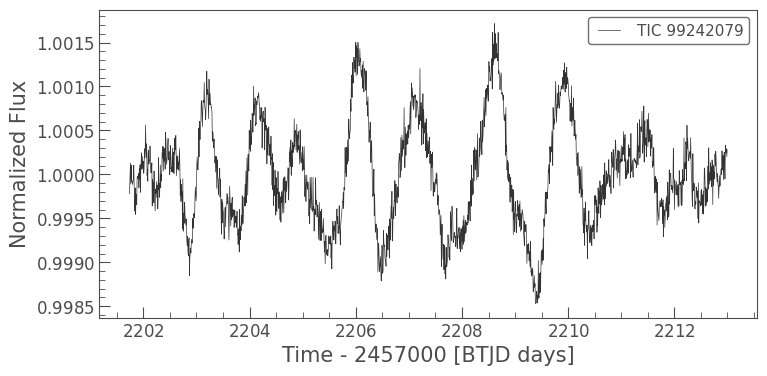

In [16]:
df_filtrado2.plot();
#plt.ylim(0.998,1.003)


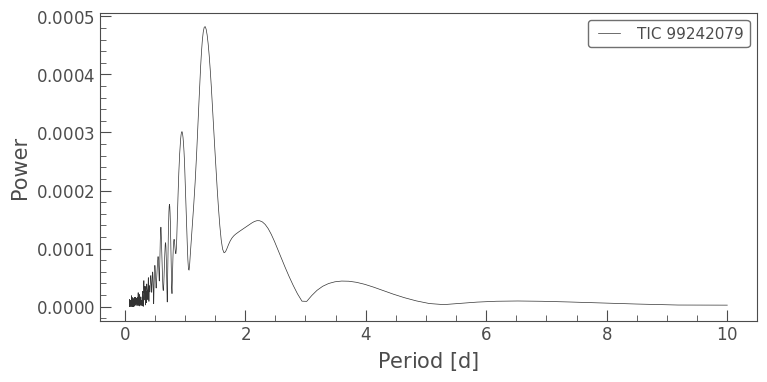

In [17]:
pg2 = df_filtrado2.to_periodogram(minimum_period=0.08*u.day, maximum_period=10*u.day, oversample_factor=10)
pg2.plot();

In [18]:
pg2.period_at_max_power

<Quantity 1.33605587 d>

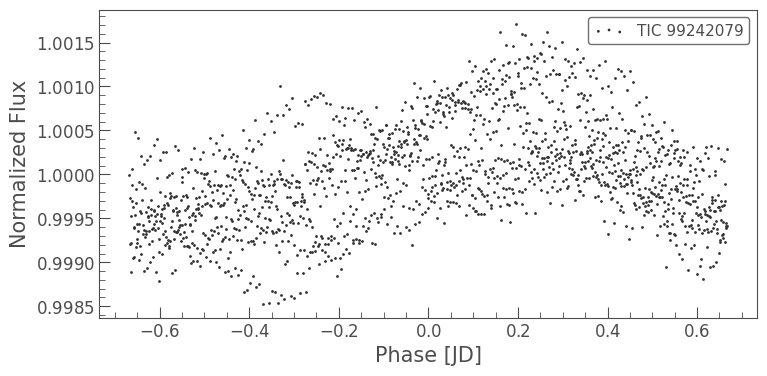

In [19]:
df_filtrado2.fold(period=pg2.period_at_max_power).scatter();

In [20]:
df_filtrado3 = lc3[lc3['time'] > Time(2229,format='btjd', scale='tdb')]
df_filtrado3 = df_filtrado3[df_filtrado3['time'] < Time(2241,format='btjd', scale='tdb')]
df_filtrado3.head()

<TessLightCurve length=5 LABEL="TIC 99242079" SECTOR=34 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
       time               flux        ... kspsap_flux_sml kspsap_flux_lag
                                      ...                                
       Time             float64       ...     float32         float32    
------------------ ------------------ ... --------------- ---------------
2229.0008112470873 1.0001157373694434 ...       1.0002255       1.0017629
2229.0077557192712 0.9990671996014506 ...       0.9994806      0.99725175
2229.0147001914884 0.9999064503792374 ...       1.0001283       1.0013677
2229.0216446637037 0.9992518621301729 ...      0.99977124      0.99687463
2229.0285891359204 0.9997558693937441 ...       1.0002154       0.9994449

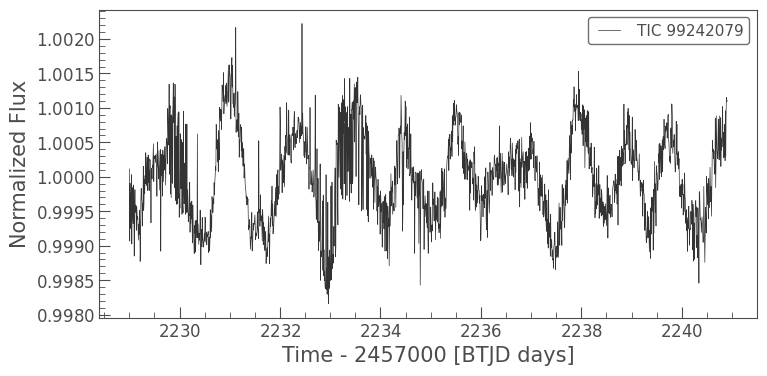

In [21]:
df_filtrado3.plot();

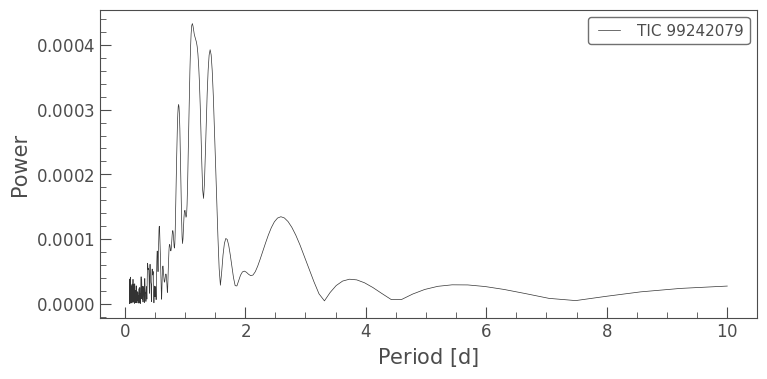

In [22]:
pg3 = df_filtrado3.to_periodogram(minimum_period=0.08*u.day, maximum_period=10*u.day, oversample_factor=10)
pg3.plot();

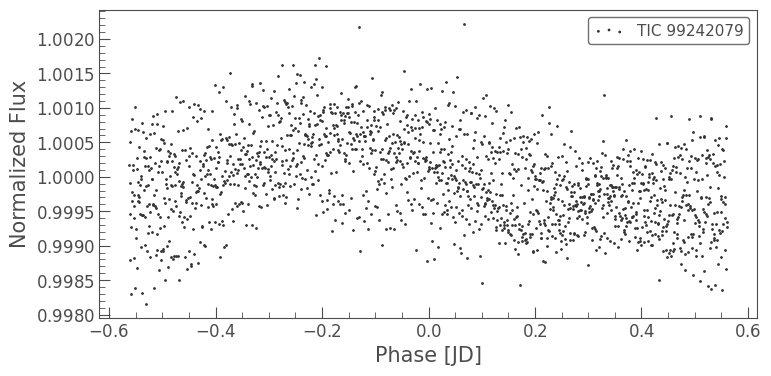

In [23]:
df_filtrado3.fold(period=pg3.period_at_max_power).scatter();

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

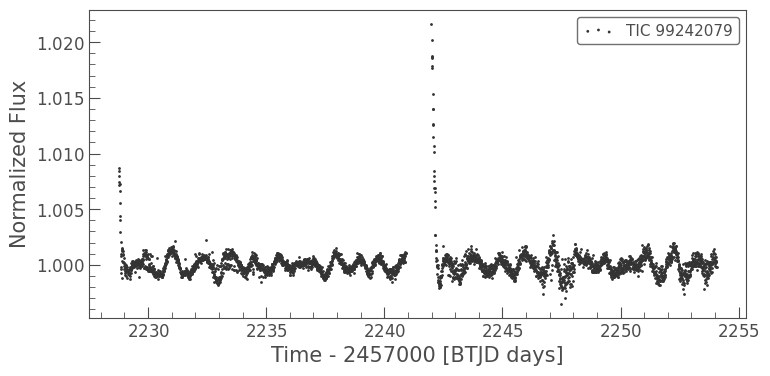

In [24]:
lc3.scatter()

In [25]:
print("Periodos \n")
print("--"*20)
print("Periodo 1: ", pg1.period_at_max_power)
print("Periodo 2: ", pg2.period_at_max_power)
print("Periodo 3: ", pg3.period_at_max_power)
print("Promedio : ", np.mean([pg1.period_at_max_power.value,pg2.period_at_max_power.value,pg3.period_at_max_power.value])*u.d)

Periodos 

----------------------------------------
Periodo 1:  1.1643845114399918 d
Periodo 2:  1.3360558733376202 d
Periodo 3:  1.123926312568428 d
Promedio :  1.20812223244868 d


In [26]:
df_filtrado3

<TessLightCurve length=1706 LABEL="TIC 99242079" SECTOR=34 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
       time               flux        ... kspsap_flux_sml kspsap_flux_lag
                                      ...                                
       Time             float64       ...     float32         float32    
------------------ ------------------ ... --------------- ---------------
2229.0008112470873 1.0001157373694434 ...       1.0002255       1.0017629
2229.0077557192712 0.9990671996014506 ...       0.9994806      0.99725175
2229.0147001914884 0.9999064503792374 ...       1.0001283       1.0013677
2229.0216446637037 0.9992518621301729 ...      0.99977124      0.99687463
2229.0285891359204 0.9997558693937441 ...       1.0002154       0.9994449
2229.0355336081357 0.9994613148887335 ...       0.9999076       0.9994011
               ...                ... ...             ...             ...
 2240.868770726038 1.0009570613543355 ...       1.0001758       1.0007124
2240.8757150249876 1.0002993047146997 ...      0.99960274      0.99843884
2240.8826593236126 1.0009620503648402 ...       1.0001595       1.0009794
2240.8896036219517 1.0011518826238797 ...       1.0003636       1.0005163
2240.8965479202916  1.001092253353507 ...       1.0001885       1.0016443
2240.9034922186333 1.0011028962456638 ...       1.0002788       1.0006443

In [27]:
deltast1 = []
deltast2 = []
deltast3 = []

for i in range(len(df_filtrado1['time'])-1):
    deltast1.append(abs(df_filtrado1['time'][i]-(df_filtrado1['time'][i+1])))
print(np.mean(deltast1))

for i in range(len(df_filtrado2['time'])-1):
    deltast2.append(abs(df_filtrado2['time'][i]-(df_filtrado2['time'][i+1])))
print(np.mean(deltast2))

for i in range(len(df_filtrado3['time'])-1):
    deltast3.append(abs(df_filtrado3['time'][i]-(df_filtrado3['time'][i+1])))
print(np.mean(deltast3))

0.020948879475616553
0.006974744569181915
0.006981044558091515


In [28]:
Δt1 = np.mean(deltast1) #abs(df_filtrado1['time'][0]-df_filtrado1['time'][1])
t1 = abs(df_filtrado1['time'][-1]-df_filtrado1['time'][0])
print(Δt1, t1)
Δt2 = np.mean(deltast2) #abs(df_filtrado2['time'][0]-df_filtrado2['time'][1])
t2 = abs(df_filtrado2['time'][-1]-df_filtrado2['time'][0])
print(Δt2, t2)
Δt3 = np.mean(deltast3) #abs(df_filtrado3['time'][0]-df_filtrado3['time'][1])
t3 = abs(df_filtrado3['time'][-1]-df_filtrado3['time'][0])
print(Δt3, t3)

0.020948879475616553 11.333343796308554
0.006974744569181915 11.257237734659611
0.006981044558091515 11.902680971546033


In [29]:
print("--"*30)
freq_max1 = 1/(2*Δt1)
freq_min1 = 1/t1
print("Frecuencia máxima QLP1: ",freq_max1)
print("Frecuencia mínima QLP1: ",freq_min1)
print("--"*30)
freq_max2 = 1/(2*Δt2)
freq_min2 = 1/t2
print("Frecuencia máxima QLP1: ",freq_max2)
print("Frecuencia mínima QLP1: ",freq_min2)
print("--"*30)
freq_max3 = 1/(2*Δt3)
freq_min3 = 1/t3
print("Frecuencia máxima QLP1: ",freq_max3)
print("Frecuencia mínima QLP1: ",freq_min3)
print("--"*30)


------------------------------------------------------------
Frecuencia máxima QLP1:  23.86762502414389 1 / d
Frecuencia mínima QLP1:  0.08823521265857262 1 / d
------------------------------------------------------------
Frecuencia máxima QLP1:  71.6872130642981 1 / d
Frecuencia mínima QLP1:  0.08883173861746976 1 / d
------------------------------------------------------------
Frecuencia máxima QLP1:  71.62251950110607 1 / d
Frecuencia mínima QLP1:  0.08401468563179598 1 / d
------------------------------------------------------------


-----------------------------------------------
Resultados para la curva de luz QLP1
Poder máximo:  0.29552797846810036
Frecuencia: 0.8558815627881544 1 / d
Periodo: 1.168385958382325 d
-----------------------------------------------
Resultados para la curva de luz QLP2
Poder máximo:  0.5282410503652796
Frecuencia: 0.755069778248493 1 / d
Periodo: 1.3243809099599542 d
-----------------------------------------------
Resultados para la curva de luz QLP3
Poder máximo:  0.30237314459596815
Frecuencia: 0.8905556676970374 1 / d
Periodo: 1.1228944312779277 d
-----------------------------------------------


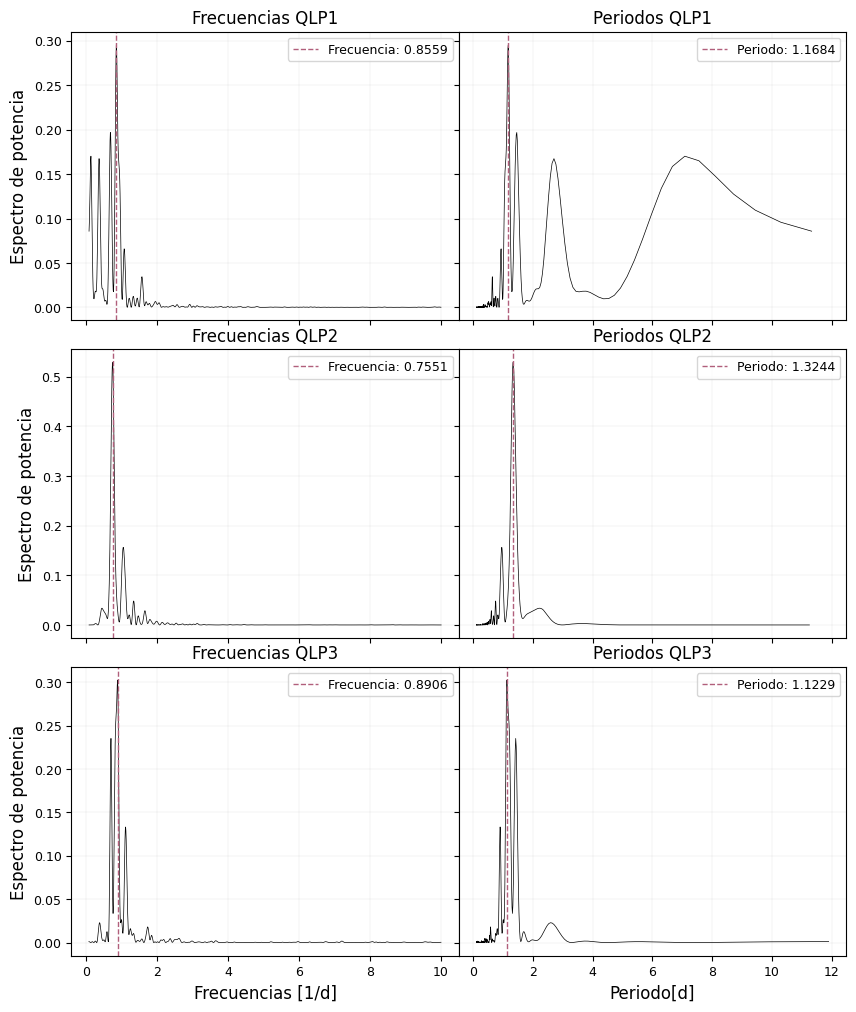

In [30]:
# Supongamos que tienes tus datos de tiempo y velocidades radiales en dos arreglos numpy, por ejemplo:
t1 = df_filtrado1['time']
y1 = df_filtrado1['flux']
dy1 = df_filtrado1['flux_err']

t2 = df_filtrado2['time']
y2 = df_filtrado2['flux']
dy2 = df_filtrado2['flux_err']

t3 = df_filtrado3['time']
y3 = df_filtrado3['flux']
dy3 = df_filtrado3['flux_err']

# Calcular el periodograma usando la transformada de Lomb-Scargle
frequency1, power1 = LombScargle(t1, y1,dy1, normalization = 'model').autopower(minimum_frequency=freq_min1,maximum_frequency=10*1/u.d,samples_per_peak=10,method='fastchi2')
frequency2, power2 = LombScargle(t2, y2,dy2, normalization = 'model').autopower(minimum_frequency=freq_min2,maximum_frequency=10*1/u.d,samples_per_peak=10,method='fastchi2')
frequency3, power3 = LombScargle(t3, y3,dy3, normalization = 'model').autopower(minimum_frequency=freq_min3,maximum_frequency=10*1/u.d,samples_per_peak=10,method='fastchi2')

print("-----------------------------------------------")
print("Resultados para la curva de luz QLP1")
print("Poder máximo: ",max(power1))
f1 = frequency1[np.argmax(power1)]
p1 = 1/frequency1[np.argmax(power1)]
print(f"Frecuencia: {f1}")
print(f"Periodo: {p1}")
print("-----------------------------------------------")
print("Resultados para la curva de luz QLP2")
print("Poder máximo: ",max(power2))
f2 = frequency2[np.argmax(power2)]
p2 = 1/frequency2[np.argmax(power2)]
print(f"Frecuencia: {f2}")
print(f"Periodo: {p2}")
print("-----------------------------------------------")
print("Resultados para la curva de luz QLP3")
print("Poder máximo: ",max(power3))
f3 = frequency3[np.argmax(power3)]
p3 = 1/frequency3[np.argmax(power3)]
print(f"Frecuencia: {f3}")
print(f"Periodo: {p3}")
print("-----------------------------------------------")

# Graficar el periodograma
fig = plt.figure(figsize=(10,12))

gs = fig.add_gridspec(3, 2, hspace=0.1, wspace=0)
(ax1,ax2), (ax3,ax4), (ax5,ax6) = gs.subplots(sharex='col', sharey='row')

##############################################################################################################3
ax1.set_title('Frecuencias QLP1', fontsize = 12)
ax2.set_title('Periodos QLP1', fontsize = 12)


ax1.plot(frequency1, power1, '-',color = 'k',linewidth = 0.5 )    # Frecuencia con el dato
ax2.plot(1/frequency1, power1, '-',color = 'k',linewidth = 0.5 )  # Periodo sin el dato 

ax1.axvline(f1.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Frecuencia: {round(f1.value,4)}")
ax2.axvline(p1.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Periodo: {round(p1.value,4)}")

ax1.set_xlabel('Frecuencias [1/d]',fontsize = 12)
ax1.set_ylabel('Espectro de potencia',fontsize = 12)
ax2.set_xlabel('Periodo[d]',fontsize = 12)
ax2.set_ylabel('Espectro de potencia',fontsize = 12)

##############################################################################################################
ax3.set_title('Frecuencias QLP2', fontsize = 12)
ax4.set_title('Periodos QLP2', fontsize = 12)


ax3.plot(frequency2, power2, '-',color = 'k',linewidth = 0.5 )    # Frecuencia con el dato
ax4.plot(1/frequency2, power2, '-',color = 'k',linewidth = 0.5 )  # Periodo sin el dato 

ax3.axvline(f2.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Frecuencia: {round(f2.value,4)}")
ax4.axvline(p2.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Periodo: {round(p2.value,4)}")

ax3.set_xlabel('Frecuencias [1/d]',fontsize = 12)
ax3.set_ylabel('Espectro de potencia',fontsize = 12)
ax4.set_xlabel('Periodo[d]',fontsize = 12)
ax4.set_ylabel('Espectro de potencia',fontsize = 12)

##############################################################################################################
ax5.set_title('Frecuencias QLP3', fontsize = 12)
ax6.set_title('Periodos QLP3', fontsize = 12)


ax5.plot(frequency3, power3, '-',color = 'k',linewidth = 0.5 )    # Frecuencia con el dato
ax6.plot(1/frequency3, power3, '-',color = 'k',linewidth = 0.5 )  # Periodo sin el dato 

ax5.axvline(f3.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Frecuencia: {round(f3.value,4)}")
ax6.axvline(p3.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Periodo: {round(p3.value,4)}")

ax5.set_xlabel('Frecuencias [1/d]',fontsize = 12)
ax5.set_ylabel('Espectro de potencia',fontsize = 12)
ax6.set_xlabel('Periodo[d]',fontsize = 12)
ax6.set_ylabel('Espectro de potencia',fontsize = 12)

##############################################################################################################

for ax in fig.get_axes():
    ax.label_outer()
    #ax.set_xlim(-1.96,0.5)
    #ax.set_ylim(-0.96,3)
    ax.legend()
    ax.grid(linestyle='-', linewidth=0.1)


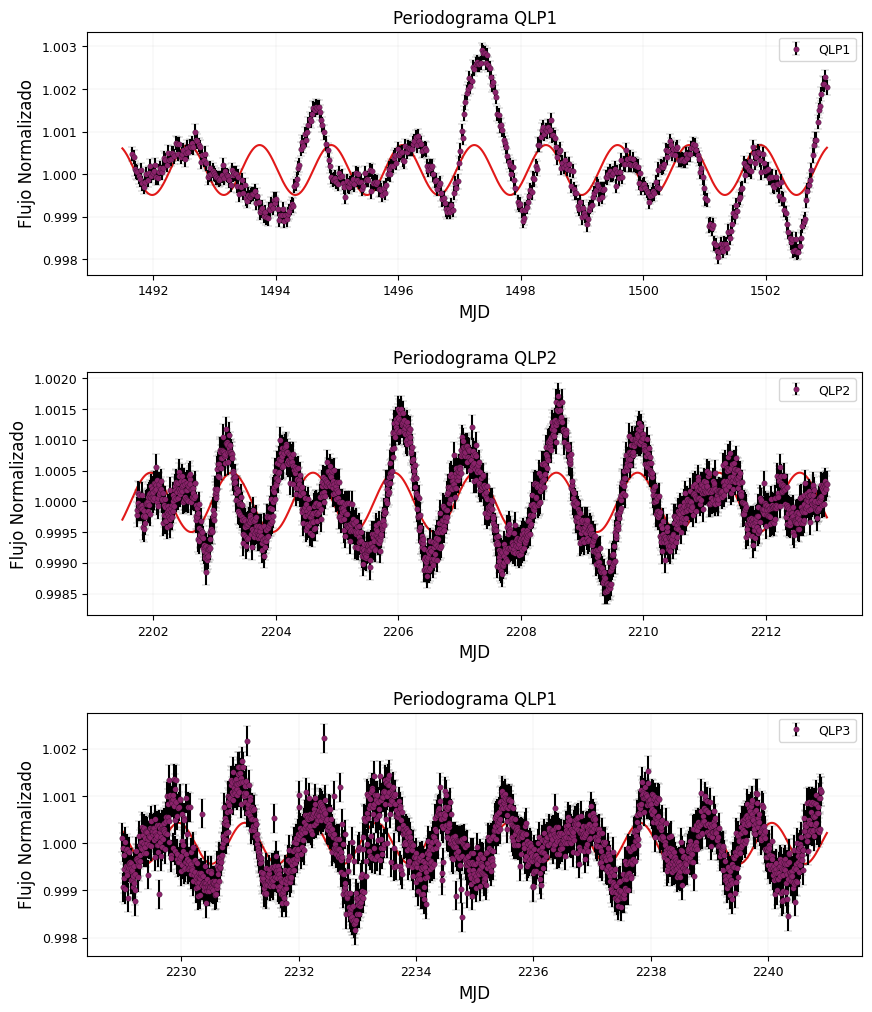

In [31]:
best_frequency1 = frequency1[np.argmax(power1)]
best_frequency2 = frequency2[np.argmax(power2)]
best_frequency3 = frequency3[np.argmax(power3)]

t_fit1 = Time(np.linspace(1491.5,1503,10000),format='btjd', scale='tdb')   # Para la primera curva de luz
t_fit2 = Time(np.linspace(2201.5,2213,10000),format='btjd', scale='tdb')   # Para la segunda curva de luz
t_fit3 = Time(np.linspace(2229,2241,10000),format='btjd', scale='tdb')

ls1 = LombScargle(t1, y1, dy1,  normalization = 'model')#.autopower(minimum_frequency=freq_min1,maximum_frequency=freq_max1,samples_per_peak=100,method='fastchi2')
ls2 = LombScargle(t2, y2, dy2,  normalization = 'model')#.autopower(minimum_frequency=freq_min2,maximum_frequency=freq_max2,samples_per_peak=100,method='fastchi2')
ls3 = LombScargle(t3, y3, dy3,  normalization = 'model')#.autopower(minimum_frequency=freq_min3,maximum_frequency=freq_max3,samples_per_peak=100,method='fastchi2')

y_fit1 = ls1.model(t_fit1, best_frequency1)
y_fit2 = ls2.model(t_fit2, best_frequency2)
y_fit3 = ls3.model(t_fit3, best_frequency3)


# Graficar el periodograma
fig = plt.figure(figsize=(10,12))
gs = fig.add_gridspec(3, 1, hspace=0.4, wspace=0.05)
(ax1),(ax2),(ax3) = gs.subplots(sharex=False)

#################################################################################

ax1.set_title('Periodograma QLP1', fontsize = 12)

ax1.plot((t_fit1).value, (y_fit1).value, '-', color = '#E11919', markersize = 0.5) 
ax1.errorbar((t1).value, y1.value,  yerr = dy1.value, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP1')

ax1.set_xlabel('MJD',fontsize = 12)
ax1.set_ylabel('Flujo Normalizado',fontsize = 12)

#################################################################################

ax2.set_title('Periodograma QLP2', fontsize = 12)

ax2.plot((t_fit2).value, (y_fit2).value, '-', color = '#E11919', markersize = 0.5) 
ax2.errorbar((t2).value, y2.value,  yerr = dy2.value, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP2')

ax2.set_xlabel('MJD',fontsize = 12)
ax2.set_ylabel('Flujo Normalizado',fontsize = 12)

################################################################################

ax3.set_title('Periodograma QLP1', fontsize = 12)

ax3.plot((t_fit3).value, (y_fit3).value, '-', color = '#E11919', markersize = 0.5) 
ax3.errorbar((t3).value, y3.value,  yerr = dy3.value, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP3')

ax3.set_xlabel('MJD',fontsize = 12)
ax3.set_ylabel('Flujo Normalizado',fontsize = 12)

################################################################################
for ax in fig.get_axes():
    #ax.label_outer()
    ax.legend()
    ax.grid(linestyle='-', linewidth=0.1)

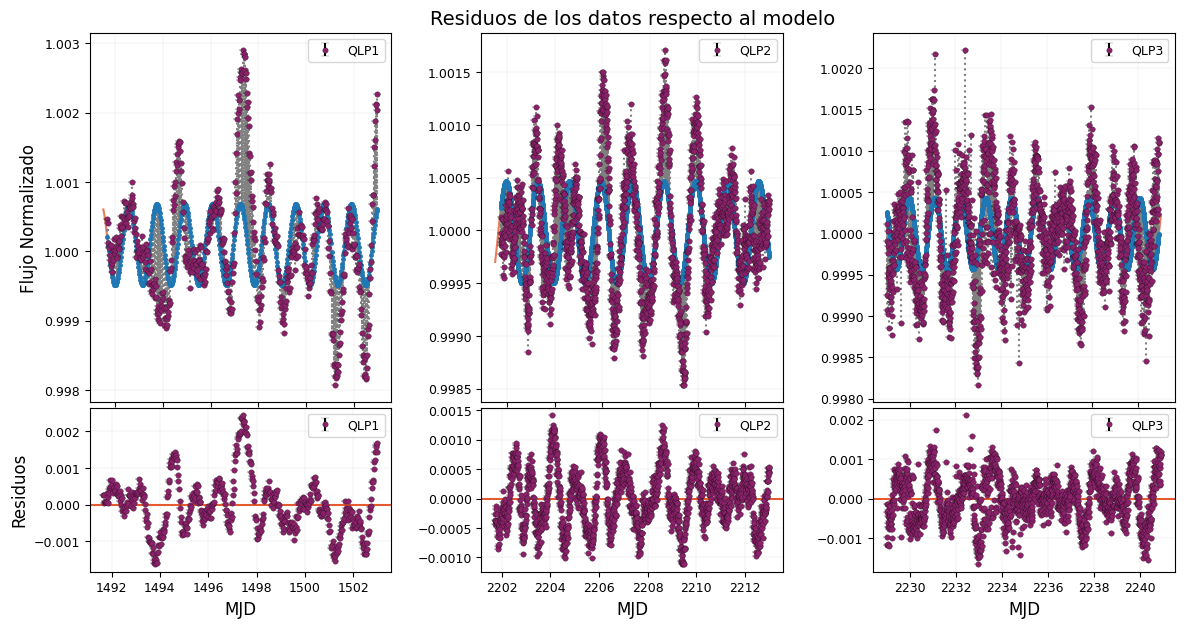

In [32]:
v_int1 = []
for i in t1.value:
    v_int1.append(np.interp(i, t_fit1.value, y_fit1.value))
y_new1 = y1.value - v_int1

v_int2 = []
for i in t2.value:
    v_int2.append(np.interp(i, t_fit2.value, y_fit2.value))
y_new2 = y2.value - v_int2

v_int3 = []
for i in t3.value:
    v_int3.append(np.interp(i, t_fit3.value, y_fit3.value))
y_new3 = y3.value - v_int3


# Graficar
fig = plt.figure(figsize=(14,7))
gs = fig.add_gridspec(2, 3, hspace=0.02, wspace=0.3, height_ratios = (1.8, 0.8))
(ax1,ax2,ax3),(ax4,ax5,ax6) = gs.subplots(sharey=False)
# Graficando los residuos.
ax1.plot((t_fit1).value, (y_fit1).value, '-', color = '#e45a31', markersize = 0.5, alpha=0.8) 

n1  = len(t1.value)

for i in range(0,n1,1):
    y0_1 = np.min([y1.value[i],v_int1[i]])
    y1_1 = np.max([y1.value[i],v_int1[i]])
    ax1.vlines(t1.value[i],y0_1,y1_1, color='grey',
               linestyle ='dotted')

ax2.plot((t_fit2).value, (y_fit2).value, '-', color = '#e45a31', markersize = 0.5, alpha=0.8) 

n2  = len(t2.value)

for i in range(0,n2,1):
    y0_2 = np.min([y2.value[i],v_int2[i]])
    y1_2 = np.max([y2.value[i],v_int2[i]])
    ax2.vlines(t2.value[i],y0_2,y1_2, color='grey',
               linestyle ='dotted')

ax3.plot((t_fit3).value, (y_fit3).value, '-', color = '#e45a31', markersize = 0.5, alpha=0.8) 

n3  = len(t3.value)

for i in range(0,n3,1):
    y0_3 = np.min([y3.value[i],v_int3[i]])
    y1_3 = np.max([y3.value[i],v_int3[i]])
    ax3.vlines(t3.value[i],y0_3,y1_3, color='grey',
               linestyle ='dotted')
    
ax2.set_title("Residuos de los datos respecto al modelo",fontsize = 14)

################################################################

ax1.plot(t1.value, v_int1,'.')
ax1.errorbar(t1.value, y1.value,  yerr = 0, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP1')
ax1.set_ylabel('Flujo Normalizado',fontsize = 12)

ax4.errorbar(t1.value, y_new1, yerr=0,linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP1')
ax4.axhline(0, color="#e45a31")
ax4.set_xlabel('MJD',fontsize = 12)
ax4.set_ylabel("Residuos",fontsize = 12)

################################################################

ax2.plot(t2.value, v_int2,'.')
ax2.errorbar(t2.value, y2.value,  yerr = 0, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP2')

ax5.errorbar(t2.value, y_new2, yerr=0,linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP2')
ax5.axhline(0, color="#e45a31")
ax5.set_xlabel('MJD',fontsize = 12)

################################################################

ax3.plot(t3.value, v_int3,'.')
ax3.errorbar(t3.value, y3.value,  yerr = 0, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP3')

ax6.errorbar(t3.value, y_new3, yerr=0,linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP3')
ax6.axhline(0, color="#e45a31")
ax6.set_xlabel('MJD',fontsize = 12)

################################################################

for ax in fig.get_axes():
    #ax.label_outer()
    ax.grid(linestyle='-', linewidth=0.1)
    ax.legend()

In [33]:
σ_residuos1 = np.sqrt(np.var(y_new1))
print(σ_residuos1)
σ_residuos2 = np.sqrt(np.var(y_new2))
print(σ_residuos2)
σ_residuos3 = np.sqrt(np.var(y_new3))
print(σ_residuos3)

0.0007579069334447525
0.0004688803626794941
0.0005569535863201685


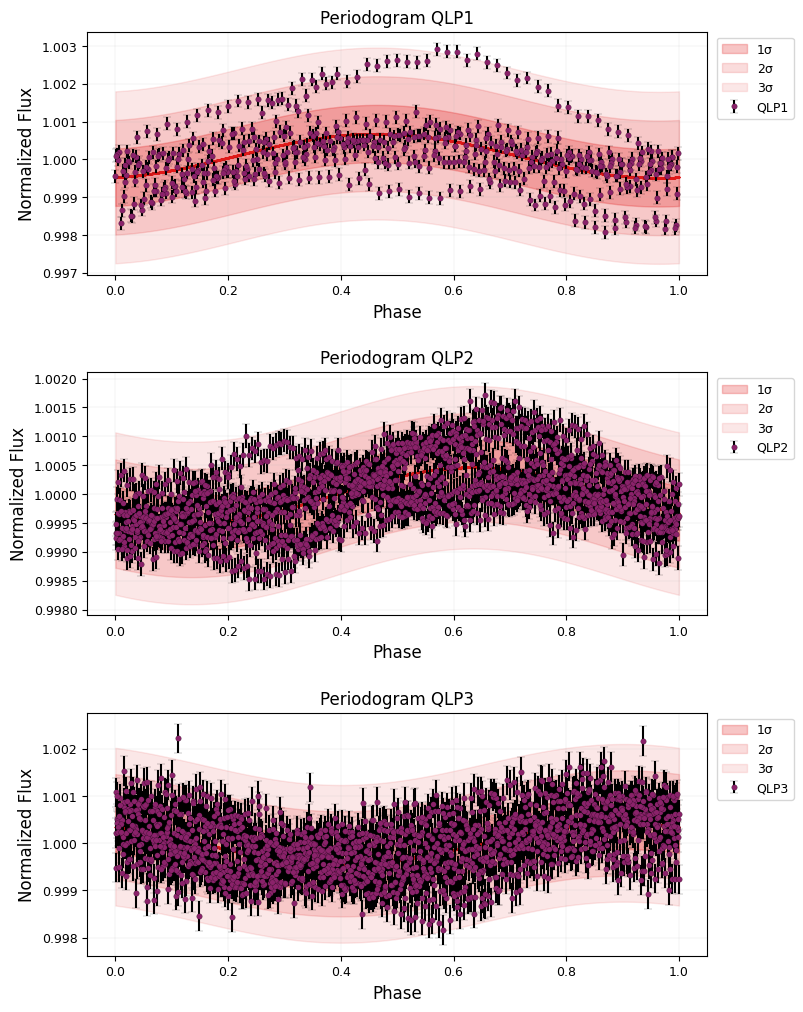

In [39]:
best_frequency1 = frequency1[np.argmax(power1)]
best_frequency2 = frequency2[np.argmax(power2)]
best_frequency3 = frequency3[np.argmax(power3)]

pt_fit1 = Time(np.linspace(0,1/best_frequency1.value,10000),format='btjd', scale='tdb')
pt_fit2 = Time(np.linspace(0,1/best_frequency2.value,10000),format='btjd', scale='tdb')
pt_fit3 = Time(np.linspace(0,1/best_frequency3.value,10000),format='btjd', scale='tdb')

ls1 = LombScargle(t1, y1, dy1,  normalization = 'model')
ls2 = LombScargle(t2, y2, dy2,  normalization = 'model')
ls3 = LombScargle(t3, y3, dy3,  normalization = 'model')

py_fit1 = ls1.model(pt_fit1, best_frequency1)
py_fit2 = ls2.model(pt_fit2, best_frequency2)
py_fit3 = ls3.model(pt_fit3, best_frequency3)

phase1 = (t1.value / p1.value) % 1
phasefit1 = (pt_fit1.value / p1.value) %1

phase2 = (t2.value / p2.value) % 1
phasefit2 = (pt_fit2.value / p2.value) %1

phase3 = (t3.value / p3.value) % 1
phasefit3 = (pt_fit3.value / p3.value) %1

# Graficar el periodograma
fig = plt.figure(figsize=(8,12))
gs = fig.add_gridspec(3, 1, hspace=0.4, wspace=0.05)
(ax1),(ax2),(ax3) = gs.subplots(sharex=False)

###########################################################################################
ax1.set_title('Periodogram QLP1', fontsize = 12)

ax1.plot(np.array(phasefit1), np.array(py_fit1), '.', color = '#E11919', markersize = 0.5) 
ax1.errorbar(np.array(phase1), y1.value,  yerr = dy1.value, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP1')

ax1.set_xlabel('Phase',fontsize = 12)
ax1.set_ylabel('Normalized Flux',fontsize = 12)

ax1.fill_between(np.array(phasefit1[:-1]),np.array(py_fit1[:-1] - 1*σ_residuos1),np.array(py_fit1[:-1] + 1*σ_residuos1),  color='#E11919', alpha=0.25, label = '1σ')
ax1.fill_between(np.array(phasefit1[:-1]),np.array(py_fit1[:-1] - 2*σ_residuos1),np.array(py_fit1[:-1] + 2*σ_residuos1),  color='#E11919', alpha=0.15, label = '2σ')
ax1.fill_between(np.array(phasefit1[:-1]),np.array(py_fit1[:-1] - 3*σ_residuos1),np.array(py_fit1[:-1] + 3*σ_residuos1),  color='#E11919', alpha=0.1, label = '3σ')

###########################################################################################
ax2.set_title('Periodogram QLP2', fontsize = 12)

ax2.plot(np.array(phasefit2), np.array(py_fit2), '.', color = '#E11919', markersize = 0.5) 
ax2.errorbar(np.array(phase2), y2.value,  yerr = dy2.value, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP2')

ax2.set_xlabel('Phase',fontsize = 12)
ax2.set_ylabel('Normalized Flux',fontsize = 12)

ax2.fill_between(np.array(phasefit2[:-1]),np.array(py_fit2[:-1] - 1*σ_residuos2),np.array(py_fit2[:-1] + 1*σ_residuos2),  color='#E11919', alpha=0.25, label = '1σ')
ax2.fill_between(np.array(phasefit2[:-1]),np.array(py_fit2[:-1] - 2*σ_residuos2),np.array(py_fit2[:-1] + 2*σ_residuos2),  color='#E11919', alpha=0.15, label = '2σ')
ax2.fill_between(np.array(phasefit2[:-1]),np.array(py_fit2[:-1] - 3*σ_residuos2),np.array(py_fit2[:-1] + 3*σ_residuos2),  color='#E11919', alpha=0.1, label = '3σ')

###########################################################################################
ax3.set_title('Periodogram QLP3', fontsize = 12)

ax3.plot(np.array(phasefit3), np.array(py_fit3), '.', color = '#E11919', markersize = 0.5) 
ax3.errorbar(np.array(phase3), y3.value,  yerr = dy3.value, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP3')

ax3.set_xlabel('Phase',fontsize = 12)
ax3.set_ylabel('Normalized Flux',fontsize = 12)

ax3.fill_between(np.array(phasefit3[:-1]),np.array(py_fit3[:-1] - 1*σ_residuos3),np.array(py_fit3[:-1] + 1*σ_residuos3),  color='#E11919', alpha=0.25, label = '1σ')
ax3.fill_between(np.array(phasefit3[:-1]),np.array(py_fit3[:-1] - 2*σ_residuos3),np.array(py_fit3[:-1] + 2*σ_residuos3),  color='#E11919', alpha=0.15, label = '2σ')
ax3.fill_between(np.array(phasefit3[:-1]),np.array(py_fit3[:-1] - 3*σ_residuos3),np.array(py_fit3[:-1] + 3*σ_residuos3),  color='#E11919', alpha=0.1, label = '3σ')

##########################################################################################

for ax in fig.get_axes():
    #ax.label_outer()
    ax.legend(bbox_to_anchor=(0.8, 0.5, 0.35, 0.5))
    ax.grid(linestyle='-', linewidth=0.1)

In [64]:
# print("-"*80)
# print("\x1b[1;34m"+"QLP1"+"\033[0m")
# print("Valor del máximo pico: ", power1.max())
# print("Diferentes Métodos de 'False Alarm Approximations'")
# print("baluev: ",ls1.false_alarm_probability(power1.max(),method='baluev', maximum_frequency = frequency1.max()))
# print("\x1b[1;35m"+f"bootstrap: {ls1.false_alarm_probability(power1.max(),method='bootstrap', maximum_frequency = frequency1.max())}"+"\033[0m")
# print("davies: ",ls1.false_alarm_probability(power1.max(),method='davies', maximum_frequency = frequency1.max()))
# print("naive: ",ls1.false_alarm_probability(power1.max(), method='naive', maximum_frequency = frequency1.max()))
# print("-"*80)

# print("-"*80)
# print("\x1b[1;34m"+"QLP2"+"\033[0m")
# print("Valor del máximo pico: ", power2.max())
# print("Diferentes Métodos de 'False Alarm Approximations'")
# print("baluev: ",ls2.false_alarm_probability(power2.max(),method='baluev', maximum_frequency = frequency2.max()))
# print("\x1b[1;35m"+f"bootstrap: {ls2.false_alarm_probability(power2.max(),method='bootstrap', maximum_frequency = frequency2.max())}"+"\033[0m")
# print("davies: ",ls2.false_alarm_probability(power2.max(),method='davies', maximum_frequency = frequency2.max()))
# print("naive: ",ls2.false_alarm_probability(power2.max(), method='naive', maximum_frequency = frequency2.max()))
# print("-"*80)

# print("-"*80)
# print("\x1b[1;34m"+"QLP3"+"\033[0m")
# print("Valor del máximo pico: ", power3.max())
# print("Diferentes Métodos de 'False Alarm Approximations'")
# print("baluev: ",ls3.false_alarm_probability(power3.max(),method='baluev', maximum_frequency = frequency3.max()))
# print("\x1b[1;35m"+f"bootstrap: {ls3.false_alarm_probability(power3.max(),method='bootstrap', maximum_frequency = frequency3.max())}"+"\033[0m")
# print("davies: ",ls3.false_alarm_probability(power3.max(),method='davies', maximum_frequency = frequency3.max()))
# print("naive: ",ls3.false_alarm_probability(power3.max(), method='naive', maximum_frequency = frequency3.max()))
# print("-"*80)

In [7]:
df1 = pd.DataFrame()
df1['time'] = lc_collection[0]['time'].value
df1['flux'] = lc_collection[0]['flux'].value.astype(np.float64)
df1['flux_err'] = lc_collection[0]['flux_err'].value.astype(np.float64)

df2 = pd.DataFrame()
df2['time'] = lc_collection[1]['time'].value
df2['flux'] = lc_collection[1]['flux'].value.astype(np.float64)
df2['flux_err'] = lc_collection[1]['flux_err'].value.astype(np.float64)

df3 = pd.DataFrame()
df3['time'] = lc_collection[2]['time'].value
df3['flux'] = lc_collection[2]['flux'].value.astype(np.float64)
df3['flux_err'] = lc_collection[2]['flux_err'].value.astype(np.float64)

New_df = pd.concat([df1, df2, df3], axis=0)
New_df

time      flux  flux_err
0     1491.660824  1.000092  0.000172
1     1491.681658  1.000026  0.000172
2     1491.702491  0.999750  0.000172
3     1491.723325  0.999688  0.000172
4     1491.744158  0.999669  0.000172
...           ...       ...       ...
3469  2254.035130  1.001004  0.000310
3470  2254.042074  1.000897  0.000310
3471  2254.049018  1.000480  0.000310
3472  2254.055963  1.001092  0.000310
3473  2254.062907  1.000493  0.000310

[8045 rows x 3 columns]

In [10]:
New_df.to_csv('Curvas_de_luz.csv', index=False)

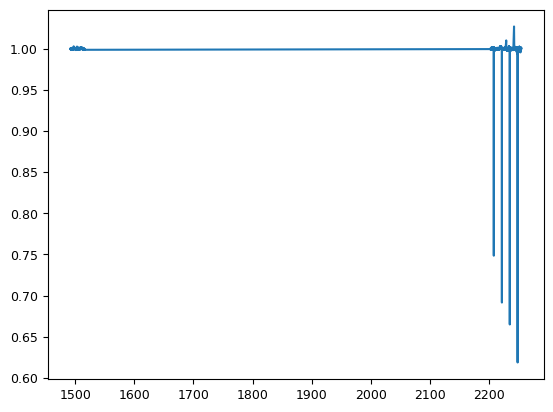

In [8]:
plt.plot(np.array(New_df['time']),np.array(New_df['flux']), '-')
#plt.ylim(0.99,1.0035)
#plt.xlim(1440,2270)

In [66]:
New_df = New_df[New_df['flux'] > 0.95] 
New_df = New_df[New_df['flux'] < 1.0035]
New_df

time      flux  flux_err
0     1491.660824  1.000092  0.000172
1     1491.681658  1.000026  0.000172
2     1491.702491  0.999750  0.000172
3     1491.723325  0.999688  0.000172
4     1491.744158  0.999669  0.000172
...           ...       ...       ...
3469  2254.035130  1.001004  0.000310
3470  2254.042074  1.000897  0.000310
3471  2254.049018  1.000480  0.000310
3472  2254.055963  1.001092  0.000310
3473  2254.062907  1.000493  0.000310

[7982 rows x 3 columns]

In [67]:
np.array(New_df['time'])

array([1491.66082396, 1491.68165754, 1491.70249113, ..., 2254.04901847,
       2254.05596266, 2254.06290685])

(1440.0, 2270.0)

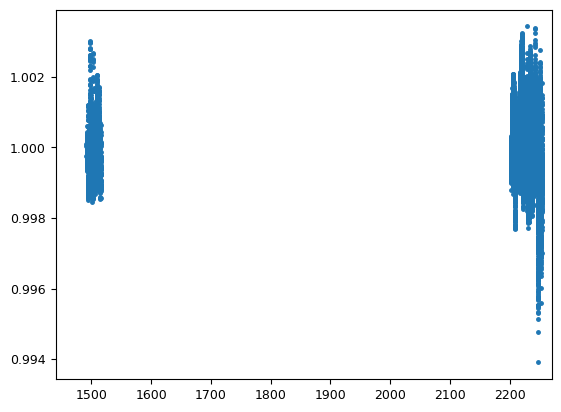

In [68]:
plt.plot(np.array(New_df['time']),np.array(New_df['flux']), '.')
#plt.ylim(0.99,1.0035)
plt.xlim(1440,2270)

In [69]:
# Supongamos que tienes tus datos de tiempo y velocidades radiales en dos arreglos numpy, por ejemplo:
t_todos = Time(New_df['time'],format='btjd', scale='tdb') 
y_todos = np.array(New_df['flux'])
dy_todos = np.array(New_df['flux_err'])

# Calcular el periodograma usando la transformada de Lomb-Scargle
frequency_todos, power_todos = LombScargle(t_todos, y_todos,dy_todos, normalization = 'model').autopower(minimum_frequency=0.033*1/u.day,maximum_frequency=4*1/u.day,samples_per_peak=1,method='fastchi2')

print("-----------------------------------------------")
print("Resultados para la curva de luz QLP1")
print("Poder máximo: ",max(power_todos))
f_todos = frequency_todos[np.argmax(power_todos)]
p_todos = 1/frequency_todos[np.argmax(power_todos)]
print(f"Frecuencia: {f_todos}")
print(f"Periodo: {p_todos}")


-----------------------------------------------
Resultados para la curva de luz QLP1
Poder máximo:  0.18324968599740352
Frecuencia: 0.13268493227536926 1 / d
Periodo: 7.536650792605735 d


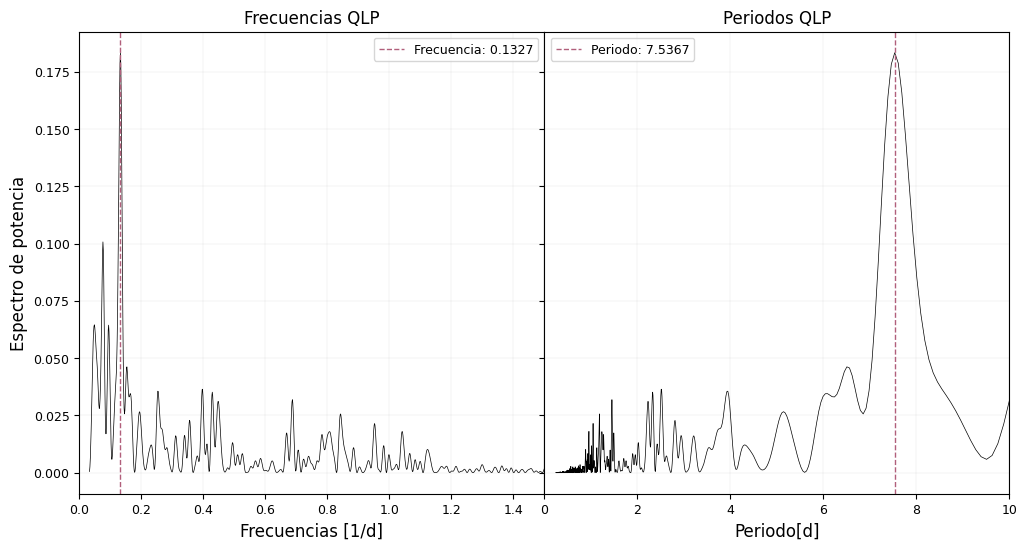

In [70]:
# Graficar el periodograma
fig = plt.figure(figsize=(12,6))

gs = fig.add_gridspec(1, 2, hspace=0.1, wspace=0)
(ax1,ax2)= gs.subplots(sharex='col', sharey='row')

##############################################################################################################3
ax1.set_title('Frecuencias QLP', fontsize = 12)
ax2.set_title('Periodos QLP', fontsize = 12)


ax1.plot(frequency_todos, power_todos, '-',color = 'k',linewidth = 0.5 )    # Frecuencia con el dato
ax2.plot(1/frequency_todos, power_todos, '-',color = 'k',linewidth = 0.5 )  # Periodo sin el dato 

ax1.axvline(f_todos.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Frecuencia: {round(f_todos.value,4)}")
ax2.axvline(p_todos.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Periodo: {round(p_todos.value,4)}")

ax1.set_xlabel('Frecuencias [1/d]',fontsize = 12)
ax1.set_ylabel('Espectro de potencia',fontsize = 12)
ax2.set_xlabel('Periodo[d]',fontsize = 12)
ax2.set_ylabel('Espectro de potencia',fontsize = 12)
ax1.set_xlim(0,1.5)

ax2.set_xlim(0,10)
for ax in fig.get_axes():
    ax.label_outer()
    #ax.set_xlim(-1.96,0.5)
    #ax.set_ylim(-0.96,3)
    ax.legend()
    ax.grid(linestyle='-', linewidth=0.1)


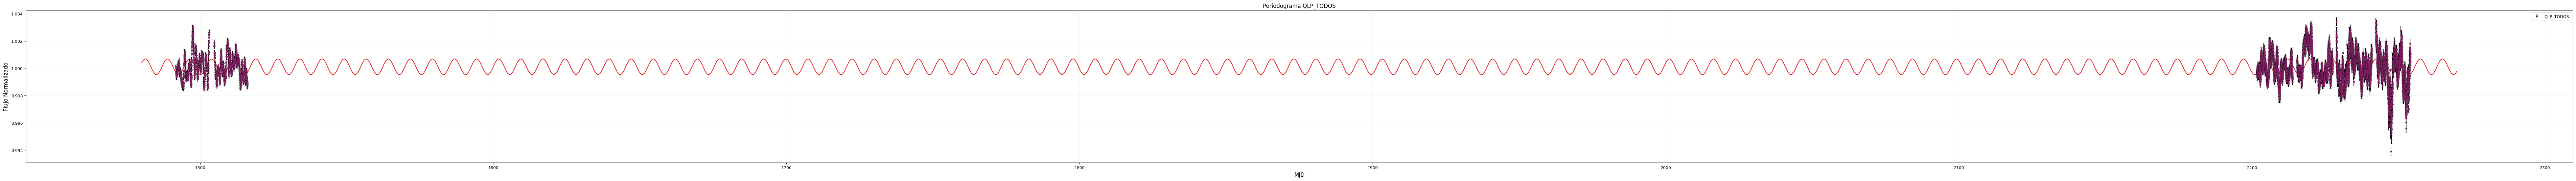

In [71]:
best_frequency_todos = frequency_todos[np.argmax(power_todos)]

t_fit_todos = Time(np.linspace(1480,2270,10000),format='btjd', scale='tdb')   # Para la primera curva de luz

ls_todos = LombScargle(t_todos, y_todos, dy_todos,  normalization = 'model')#.autopower(minimum_frequency=freq_min1,maximum_frequency=freq_max1,samples_per_peak=100,method='fastchi2')

y_fit_todos = ls_todos.model(t_fit_todos, best_frequency_todos)

# Graficar el periodograma
fig = plt.figure(figsize=(100,6))
gs = fig.add_gridspec(1, 1, hspace=0.4, wspace=0.05)
(ax1)= gs.subplots(sharex=False)

#################################################################################

ax1.set_title('Periodograma QLP_TODOS', fontsize = 12)

ax1.plot((t_fit_todos).value, (y_fit_todos).value, '-', color = '#E11919', markersize = 0.5) 
ax1.errorbar((t_todos).value, np.array(y_todos),  yerr = np.array(dy_todos), linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP_TODOS')

ax1.set_xlabel('MJD',fontsize = 12)
ax1.set_ylabel('Flujo Normalizado',fontsize = 12)


################################################################################
for ax in fig.get_axes():
    #ax.label_outer()
    ax.legend()
    ax.grid(linestyle='-', linewidth=0.1)

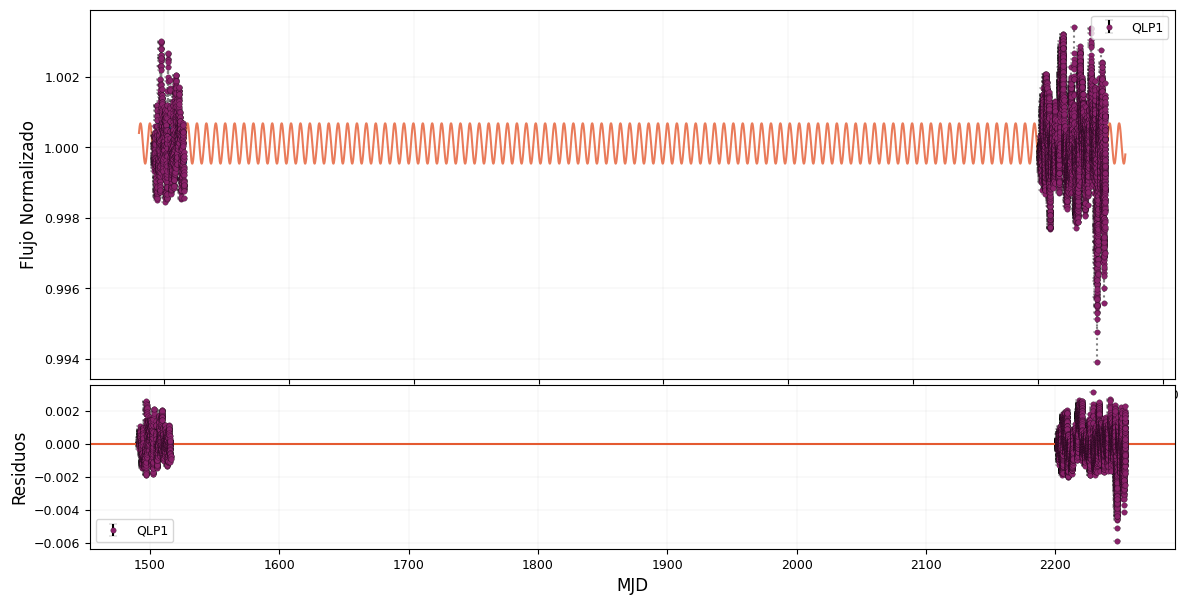

In [72]:
v_int_todos = []
for i in t_todos.value:
    v_int_todos.append(np.interp(i, t_fit_todos.value, y_fit_todos.value))
y_new_todos = y_todos - v_int_todos


# Graficar
fig = plt.figure(figsize=(14,7))
gs = fig.add_gridspec(2, 1, hspace=0.02, wspace=0.3, height_ratios = (1.8, 0.8))
(ax1),(ax4) = gs.subplots(sharey=False)
# Graficando los residuos.
ax1.plot((t_fit_todos).value, (y_fit_todos).value, '-', color = '#e45a31', markersize = 0.5, alpha=0.8) 

n_todos  = len(t_todos.value)

for i in range(0,n_todos,1):
    y0_todos = np.min([y_todos[i],v_int_todos[i]])
    y1_todos = np.max([y_todos[i],v_int_todos[i]])
    ax1.vlines(t_todos.value[i],y0_todos,y1_todos, color='grey',
               linestyle ='dotted')


################################################################

ax1.plot(t_todos.value, v_int_todos,'.')
ax1.errorbar(t_todos.value, y_todos,  yerr = 0, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP1')
ax1.set_ylabel('Flujo Normalizado',fontsize = 12)

ax4.errorbar(t_todos.value, y_new_todos, yerr=0,linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP1')
ax4.axhline(0, color="#e45a31")
ax4.set_xlabel('MJD',fontsize = 12)
ax4.set_ylabel("Residuos",fontsize = 12)

################################################################

for ax in fig.get_axes():
    #ax.label_outer()
    ax.grid(linestyle='-', linewidth=0.1)
    ax.legend()

In [45]:
σ_residuos_todos = np.sqrt(np.var(y_new_todos))
print(σ_residuos_todos)

0.0009897466220605991


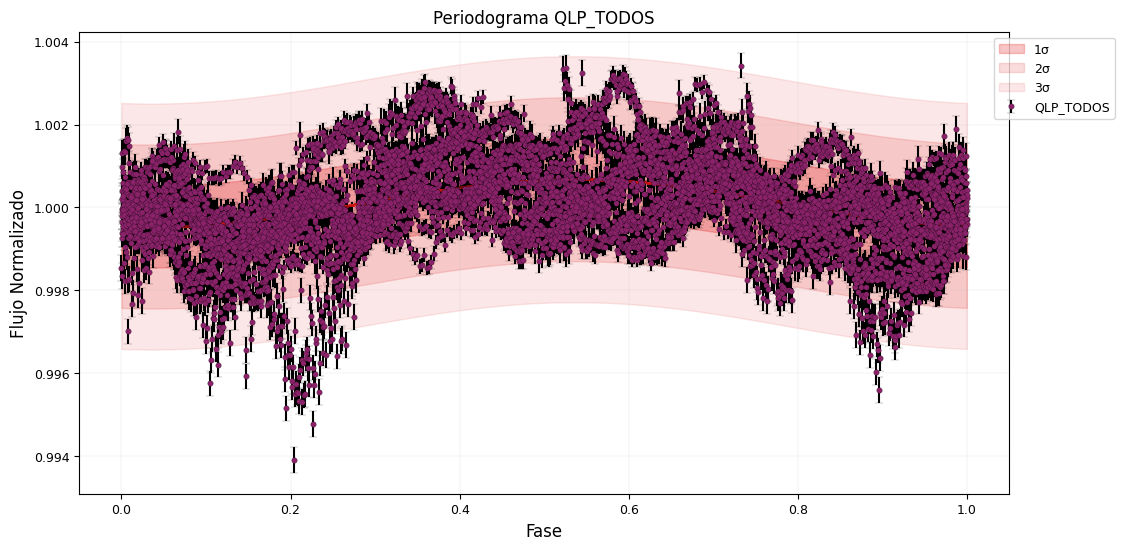

In [46]:
best_frequency_todos = frequency_todos[np.argmax(power_todos)]

pt_fit_todos = Time(np.linspace(0,1/best_frequency_todos.value,10000),format='btjd', scale='tdb')

ls_todos = LombScargle(t_todos, y_todos, dy_todos,  normalization = 'model')

py_fit_todos = ls_todos.model(pt_fit_todos, best_frequency_todos)

phase_todos = (t_todos.value / p_todos.value) % 1
phasefit_todos = (pt_fit_todos.value / p_todos.value) %1

# Graficar el periodograma
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1, 1, hspace=0.4, wspace=0.05)
(ax1) = gs.subplots(sharex=False)

###########################################################################################
ax1.set_title('Periodograma QLP_TODOS', fontsize = 12)

ax1.plot(np.array(phasefit_todos), np.array(py_fit_todos), '.', color = '#E11919', markersize = 0.5) 
ax1.errorbar(np.array(phase_todos), y_todos,  yerr = dy_todos, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP_TODOS')

ax1.set_xlabel('Fase',fontsize = 12)
ax1.set_ylabel('Flujo Normalizado',fontsize = 12)

ax1.fill_between(np.array(phasefit_todos[:-1]),np.array(py_fit_todos[:-1] - 1*σ_residuos_todos),np.array(py_fit_todos[:-1] + 1*σ_residuos_todos),  color='#E11919', alpha=0.25, label = '1σ')
ax1.fill_between(np.array(phasefit_todos[:-1]),np.array(py_fit_todos[:-1] - 2*σ_residuos_todos),np.array(py_fit_todos[:-1] + 2*σ_residuos_todos),  color='#E11919', alpha=0.15, label = '2σ')
ax1.fill_between(np.array(phasefit_todos[:-1]),np.array(py_fit_todos[:-1] - 3*σ_residuos_todos),np.array(py_fit_todos[:-1] + 3*σ_residuos_todos),  color='#E11919', alpha=0.1, label = '3σ')

###########################################################################################

for ax in fig.get_axes():
    #ax.label_outer()
    ax.legend(bbox_to_anchor=(0.8, 0.5, 0.32, 0.5))
    ax.grid(linestyle='-', linewidth=0.1)

Haciendo de nuevo el Lomb-Scargle pero con los residuos a ver que sale:

In [47]:
# Supongamos que tienes tus datos de tiempo y velocidades radiales en dos arreglos numpy, por ejemplo:
t_todos_residuos = Time(New_df['time'],format='btjd', scale='tdb') 
y_todos_residuos = y_new_todos

# Calcular el periodograma usando la transformada de Lomb-Scargle
frequency_todos_residuos, power_todos_residuos = LombScargle(t_todos_residuos, y_todos_residuos, normalization = 'model').autopower(minimum_frequency=0.033*1/u.day,maximum_frequency=4*1/u.day,samples_per_peak=1,method='fastchi2')

print("-----------------------------------------------")
print("Resultados para la curva de luz QLP1")
print("Poder máximo: ",max(power_todos_residuos))
f_todos_residuos = frequency_todos_residuos[np.argmax(power_todos_residuos)]
p_todos_residuos = 1/frequency_todos_residuos[np.argmax(power_todos_residuos)]
print(f"Frecuencia: {f_todos_residuos}")
print(f"Periodo: {p_todos_residuos}")


-----------------------------------------------
Resultados para la curva de luz QLP1
Poder máximo:  0.09063866148670881
Frecuencia: 0.048739726148742515 1 / d
Periodo: 20.517144412100887 d


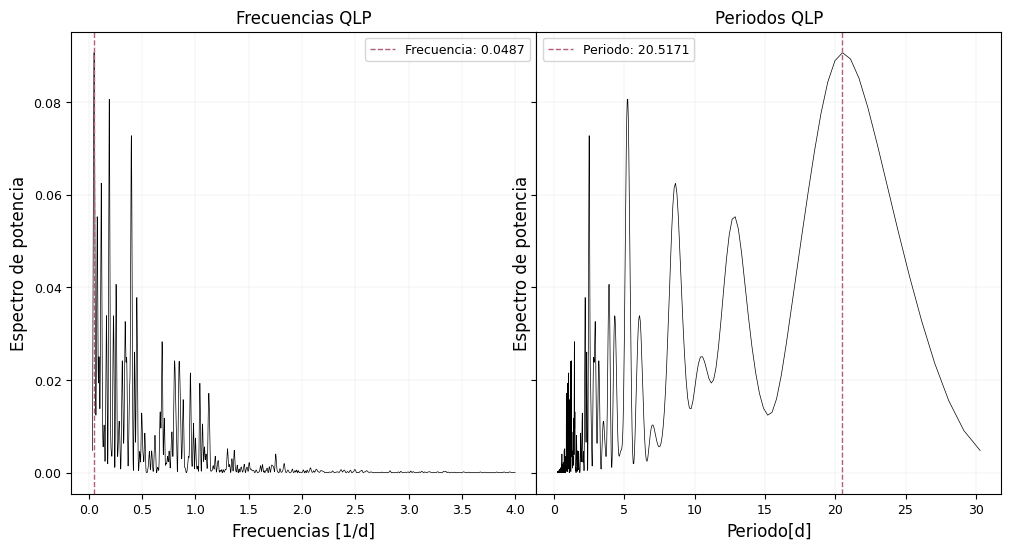

In [48]:
# Graficar el periodograma
fig = plt.figure(figsize=(12,6))

gs = fig.add_gridspec(1, 2, hspace=0.1, wspace=0)
(ax1,ax2)= gs.subplots(sharex='col', sharey='row')

##############################################################################################################3
ax1.set_title('Frecuencias QLP', fontsize = 12)
ax2.set_title('Periodos QLP', fontsize = 12)


ax1.plot(frequency_todos_residuos, power_todos_residuos, '-',color = 'k',linewidth = 0.5 )    # Frecuencia con el dato
ax2.plot(1/frequency_todos_residuos, power_todos_residuos, '-',color = 'k',linewidth = 0.5 )  # Periodo sin el dato 

ax1.axvline(f_todos_residuos.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Frecuencia: {round(f_todos_residuos.value,4)}")
ax2.axvline(p_todos_residuos.value, color = "#B15F7B", linewidth = 1., linestyle = "dashed", label = f"Periodo: {round(p_todos_residuos.value,4)}")

ax1.set_xlabel('Frecuencias [1/d]',fontsize = 12)
ax1.set_ylabel('Espectro de potencia',fontsize = 12)
ax2.set_xlabel('Periodo[d]',fontsize = 12)
ax2.set_ylabel('Espectro de potencia',fontsize = 12)

#ax2.set_xlim(0,50)
for ax in fig.get_axes():
    #ax.label_outer()
    #ax.set_xlim(-1.96,0.5)
    #ax.set_ylim(-0.96,3)
    ax.legend()
    ax.grid(linestyle='-', linewidth=0.1)


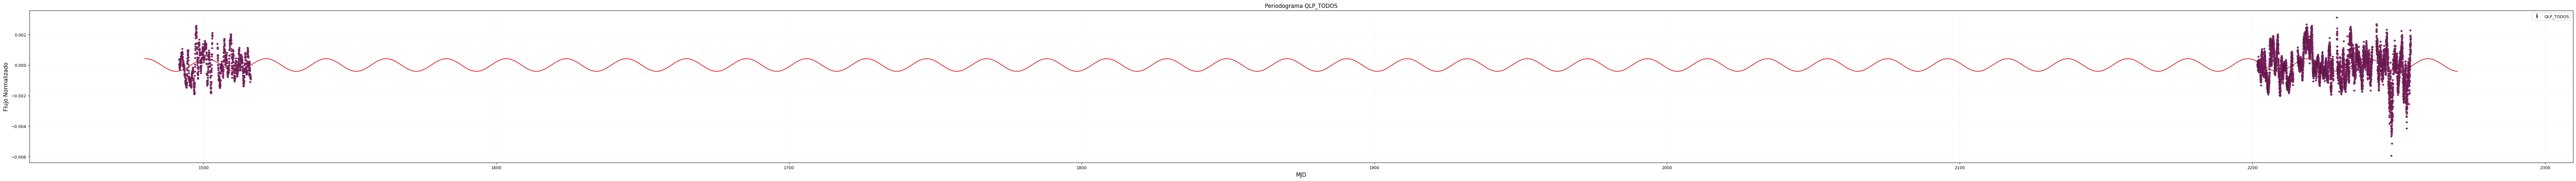

In [49]:
best_frequency_todos_residuos = frequency_todos_residuos[np.argmax(power_todos_residuos)]

t_fit_todos_residuos = Time(np.linspace(1480,2270,10000),format='btjd', scale='tdb')   # Para la primera curva de luz

ls_todos_residuos = LombScargle(t_todos_residuos, y_todos_residuos,  normalization = 'model')#.autopower(minimum_frequency=freq_min1,maximum_frequency=freq_max1,samples_per_peak=100,method='fastchi2')

y_fit_todos_residuos = ls_todos_residuos.model(t_fit_todos_residuos, best_frequency_todos_residuos)

# Graficar el periodograma
fig = plt.figure(figsize=(100,6))
gs = fig.add_gridspec(1, 1, hspace=0.4, wspace=0.05)
(ax1)= gs.subplots(sharex=False)

#################################################################################

ax1.set_title('Periodograma QLP_TODOS', fontsize = 12)

ax1.plot((t_fit_todos_residuos).value, (y_fit_todos_residuos).value, '-', color = '#E11919', markersize = 0.5) 
ax1.errorbar((t_todos_residuos).value, np.array(y_todos_residuos),  yerr = 0, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP_TODOS')

ax1.set_xlabel('MJD',fontsize = 12)
ax1.set_ylabel('Flujo Normalizado',fontsize = 12)


################################################################################
for ax in fig.get_axes():
    #ax.label_outer()
    ax.legend()
    ax.grid(linestyle='-', linewidth=0.1)

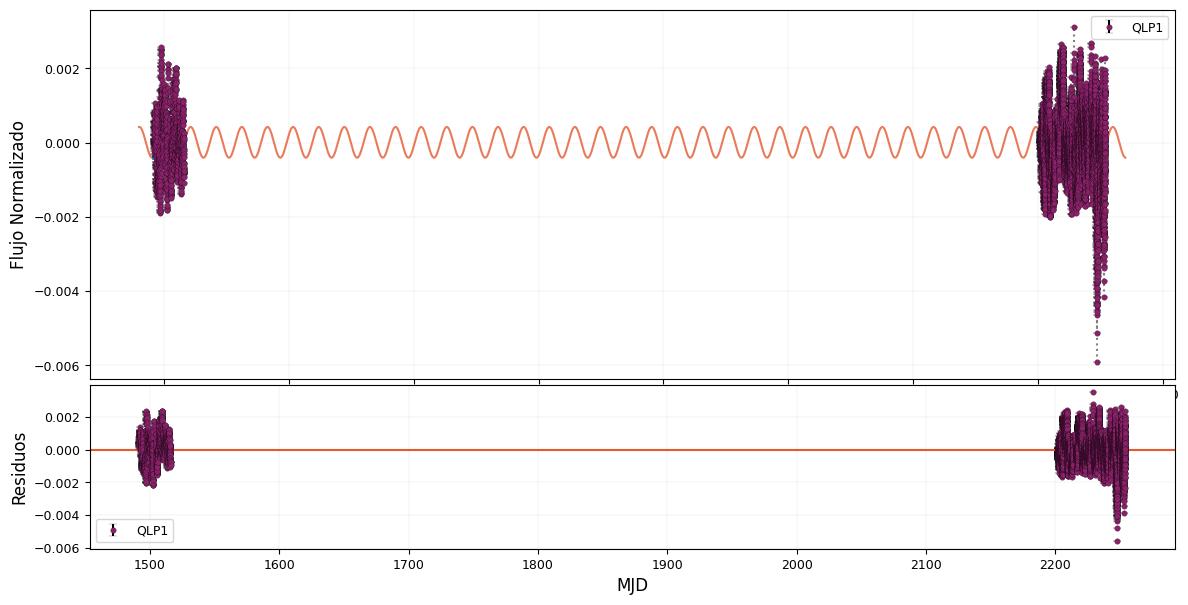

In [50]:
v_int_todos_residuos = []
for i in t_todos_residuos.value:
    v_int_todos_residuos.append(np.interp(i, t_fit_todos_residuos.value, y_fit_todos_residuos.value))
y_new_todos_residuos = y_todos_residuos - v_int_todos_residuos


# Graficar
fig = plt.figure(figsize=(14,7))
gs = fig.add_gridspec(2, 1, hspace=0.02, wspace=0.3, height_ratios = (1.8, 0.8))
(ax1),(ax4) = gs.subplots(sharey=False)
# Graficando los residuos.
ax1.plot((t_fit_todos_residuos).value, (y_fit_todos_residuos).value, '-', color = '#e45a31', markersize = 0.5, alpha=0.8) 

n_todos_residuos  = len(t_todos_residuos.value)

for i in range(0,n_todos_residuos,1):
    y0_todos_residuos = np.min([y_todos_residuos[i],v_int_todos_residuos[i]])
    y1_todos_residuos = np.max([y_todos_residuos[i],v_int_todos_residuos[i]])
    ax1.vlines(t_todos_residuos.value[i],y0_todos_residuos,y1_todos_residuos, color='grey',
               linestyle ='dotted')


################################################################

ax1.plot(t_todos_residuos.value, v_int_todos_residuos,'.')
ax1.errorbar(t_todos_residuos.value, y_todos_residuos,  yerr = 0, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP1')
ax1.set_ylabel('Flujo Normalizado',fontsize = 12)

ax4.errorbar(t_todos_residuos.value, y_new_todos_residuos, yerr=0,linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP1')
ax4.axhline(0, color="#e45a31")
ax4.set_xlabel('MJD',fontsize = 12)
ax4.set_ylabel("Residuos",fontsize = 12)

################################################################

for ax in fig.get_axes():
    #ax.label_outer()
    ax.grid(linestyle='-', linewidth=0.1)
    ax.legend()

In [51]:
σ_residuos_todos_residuos = np.sqrt(np.var(y_new_todos_residuos))
print(σ_residuos_todos_residuos)

0.0009477277295127022


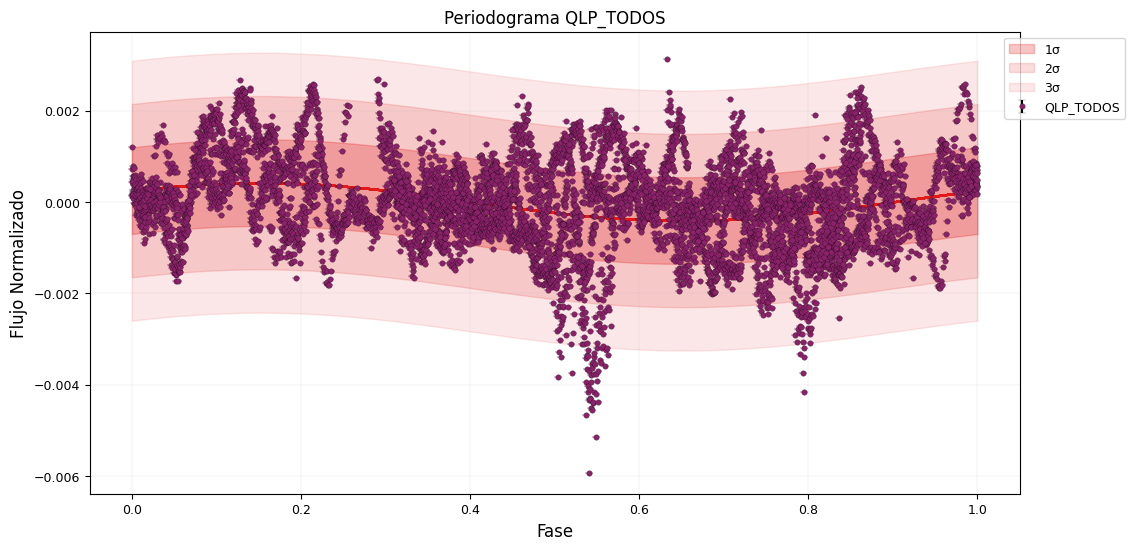

In [52]:
best_frequency_todos_residuos = frequency_todos_residuos[np.argmax(power_todos_residuos)]

pt_fit_todos_residuos = Time(np.linspace(0,1/best_frequency_todos_residuos.value,10000),format='btjd', scale='tdb')

ls_todos_residuos = LombScargle(t_todos_residuos, y_todos_residuos,  normalization = 'model')

py_fit_todos_residuos = ls_todos_residuos.model(pt_fit_todos_residuos, best_frequency_todos_residuos)

phase_todos_residuos = (t_todos_residuos.value / p_todos_residuos.value) % 1
phasefit_todos_residuos = (pt_fit_todos_residuos.value / p_todos_residuos.value) %1

# Graficar el periodograma
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1, 1, hspace=0.4, wspace=0.05)
(ax1) = gs.subplots(sharex=False)

###########################################################################################
ax1.set_title('Periodograma QLP_TODOS', fontsize = 12)

ax1.plot(np.array(phasefit_todos_residuos), np.array(py_fit_todos_residuos), '.', color = '#E11919', markersize = 0.5) 
ax1.errorbar(np.array(phase_todos_residuos), y_todos_residuos,  yerr = 0, linestyle="None",  fmt="o",  capsize=3,  ecolor="k", mfc='#8a226a',mec='k', ms=4, mew=0.15, label ='QLP_TODOS')

ax1.set_xlabel('Fase',fontsize = 12)
ax1.set_ylabel('Flujo Normalizado',fontsize = 12)

ax1.fill_between(np.array(phasefit_todos_residuos[:-1]),np.array(py_fit_todos_residuos[:-1] - 1*σ_residuos_todos_residuos),np.array(py_fit_todos_residuos[:-1] + 1*σ_residuos_todos_residuos),  color='#E11919', alpha=0.25, label = '1σ')
ax1.fill_between(np.array(phasefit_todos_residuos[:-1]),np.array(py_fit_todos_residuos[:-1] - 2*σ_residuos_todos_residuos),np.array(py_fit_todos_residuos[:-1] + 2*σ_residuos_todos_residuos),  color='#E11919', alpha=0.15, label = '2σ')
ax1.fill_between(np.array(phasefit_todos_residuos[:-1]),np.array(py_fit_todos_residuos[:-1] - 3*σ_residuos_todos_residuos),np.array(py_fit_todos_residuos[:-1] + 3*σ_residuos_todos_residuos),  color='#E11919', alpha=0.1, label = '3σ')

###########################################################################################

for ax in fig.get_axes():
    #ax.label_outer()
    ax.legend(bbox_to_anchor=(0.8, 0.5, 0.32, 0.5))
    ax.grid(linestyle='-', linewidth=0.1)

**Ostros Autores**

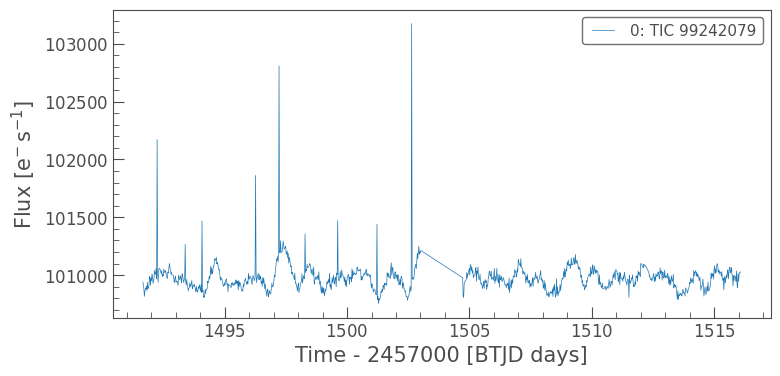

In [53]:
search_result_GSFC = lk.search_lightcurve(id, author = 'GSFC-ELEANOR-LITE')
lc_collection_GSFC = search_result_GSFC.download_all()
lc_collection_GSFC.plot();

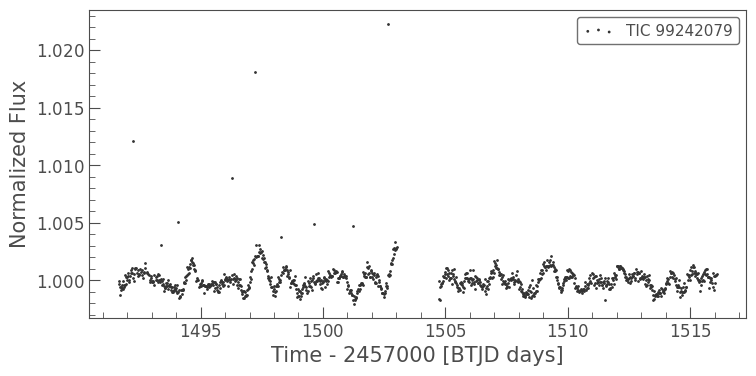

In [54]:
lc4 = lc_collection_GSFC[0].flatten(window_length=361).remove_outliers(sigma = 30)
lc4.scatter();

#plt.ylim(0.996,1.003)

(1492.0, 1503.0)

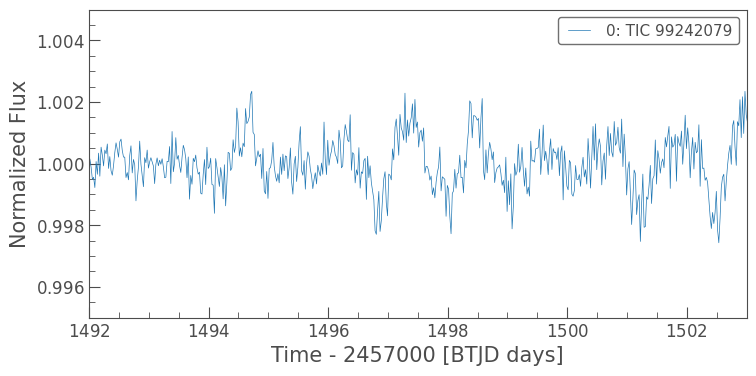

In [55]:
search_result = lk.search_lightcurve(id, author = 'TGLC')
lc_collection = search_result.download_all()
lc_collection.plot();
plt.ylim(0.995,1.005)
plt.xlim(1492,1503)

### TYC 250-1352-1 | TIC 411152791

In [56]:
tic_ids = 411152791
ids = 'TIC411152791'

In [57]:
search_result = lk.search_lightcurve('TIC {}'.format(tic_ids))
print(search_result)

SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 45 2021    QLP     600   411152791      0.0
  1 TESS Sector 46 2021    QLP     600   411152791      0.0


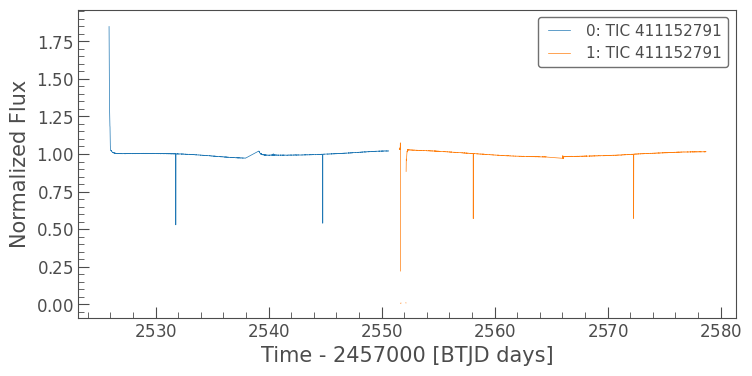

In [58]:
search_result = lk.search_lightcurve(ids, author = 'QLP')
lc_collection = search_result.download_all()
lc_collection.plot();

(0.998, 1.003)

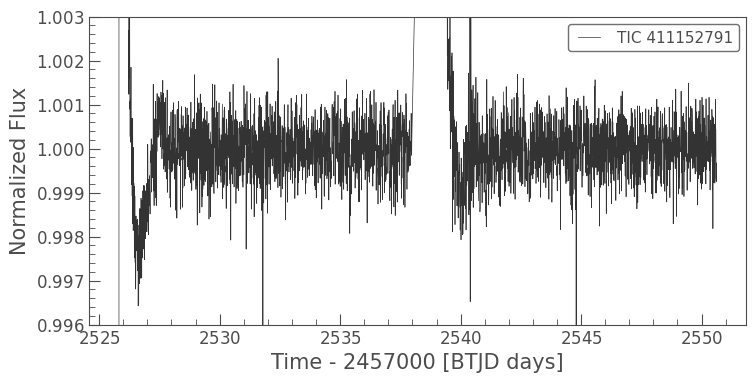

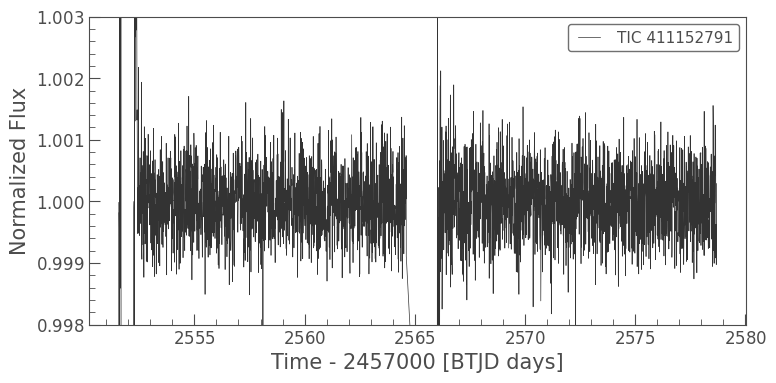

In [59]:
lc1 = lc_collection[0].flatten(window_length=361).remove_outliers(sigma = 30)
lc1.plot();
plt.ylim(0.996,1.003)
#plt.xlim(2530,2535)

lc2 = lc_collection[1].flatten(window_length=361).remove_outliers(sigma = 30)
lc2.plot();
plt.ylim(0.998,1.003)
#plt.xlim(2555,2560)

## Corriendo Juliet

#### TIC99242079
59616.23271964618	315638.400	13.000	FIDEOS
59650.10320109323	315535.700	09.800	FIDEOS
59656.0512570944	315577.800	11.400	FIDEOS
59657.12144344438	315596.800	13.600	FIDEOS
59658.05911761139	315578.100	09.100	FIDEOS
59661.10135918918	315531.800	12.000	FIDEOS
59664.12034640477	315505.200	10.200	FIDEOS
59666.11733959911	315541.700	11.800	FIDEOS

In [1]:
import os
import numpy as np 
path = '/home/alexandert/Docs_Jupyter/9.Joven_Investigador/Datos_Juliet'

os.chdir(path)

In [2]:
folder = '/home/alexandert/Docs_Jupyter/9.Joven_Investigador/Datos_Juliet'

rvfile= 'fideos.txt'

#targ bjd rv e_rv instr

bjd = []
rv = []
e_rv = []
instr = []

# open file for reading
with open(rvfile, 'r') as f:
    for line in f.readlines():
        if "#" not in line:
            data = line.split()
            bjd.append(np.float64(data[0])-2457000)
            rv.append(np.float64(data[1])*1000)
            e_rv.append(np.float64(data[2])*1000)
            instr.append(data[3])


In [3]:
bjd

[-4854383.767280353,
 -4854349.896798907,
 -4854343.948742906,
 -4854342.878556555,
 -4854341.9408823885,
 -4854338.898640811,
 -4854335.879653595,
 -4854333.882660401]

In [77]:
import juliet
priors = {}

# Name of the parameters to be fit:
params = ['P_p1','t0_p1','mu_CORALIE14', \
          'mu_CORALIE07','mu_HARPS','mu_FIDEOS',\
          'K_p1', 'ecc_p1', 'omega_p1', 'sigma_w_CORALIE14','sigma_w_CORALIE07',\
           'sigma_w_HARPS','sigma_w_FIDEOS']

# Distributions:
dists = ['normal','normal','uniform', \
         'uniform','uniform','uniform',\
         'uniform','fixed', 'fixed', 'loguniform', 'loguniform',\
         'loguniform', 'loguniform']

# Hyperparameters 10.463053
hyperps = [[10.463053 ,0.000073], [2458325.5386,0.0011], [-100,100], \
           [-100,100], [-100,100], [-100,100], \
           [0.,100.], 0., 90., [1e-3, 100.], [1e-3, 100.], \
           [1e-3, 100.], [1e-3, 100.]]

# Populate the priors dictionary:
for param, dist, hyperp in zip(params, dists, hyperps):
    priors[param] = {}
    priors[param]['distribution'], priors[param]['hyperparameters'] = dist, hyperp

dataset = juliet.load(priors = priors, rvfilename='fideos.txt', out_folder = 'fideos_rvs')
results = dataset.fit(n_live_points = 300)

PyMultinest installation not detected. Forcing dynesty as the sampler.
Detected dynesty sampler output files --- extracting from fideos_rvs/_dynesty_NS_posteriors.pkl


(-4854390.0, -4854330.0)

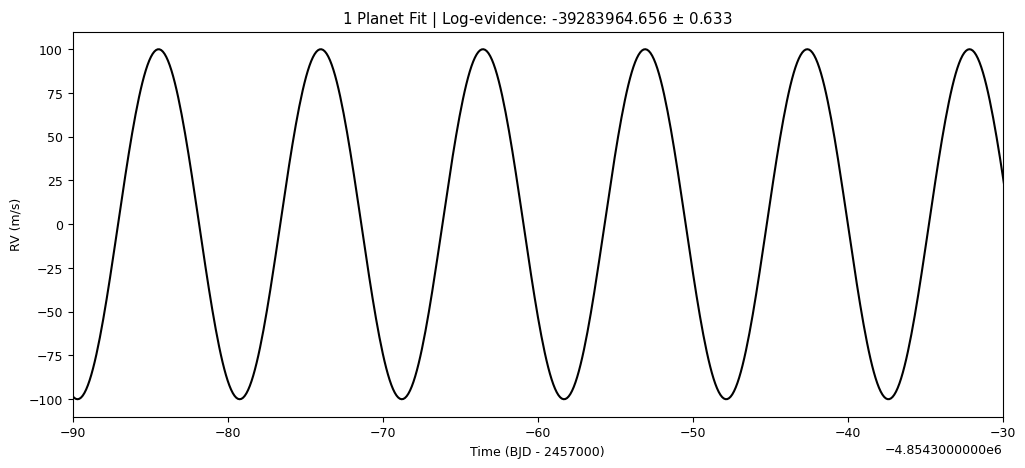

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Plot HARPS and FEROS datasets in the same panel. For this, first select any
# of the two and substract the systematic velocity to get the Keplerian signal.
# Let's do it with FEROS. First generate times on which to evaluate the model:
min_time, max_time = np.min(dataset.times_rv['FIDEOS'])-30,\
                     np.max(dataset.times_rv['FIDEOS'])+30

model_times = np.linspace(min_time,max_time,1000)

# Now evaluate the model in those times, and substract the systemic-velocity to
# get the Keplerian signal:
keplerian = results.rv.evaluate('FIDEOS', t = model_times) - \
            np.median(results.posteriors['posterior_samples']['mu_FIDEOS'])

# Now plot the (systematic-velocity corrected) RVs:
fig = plt.figure(figsize=(12,5))
instruments = ['FIDEOS']
colors = ['cornflowerblue','orangered']
for i in range(len(instruments)):
    instrument = instruments[i]
    # Evaluate the median jitter for the instrument:
    jitter = np.median(results.posteriors['posterior_samples']['sigma_w_'+instrument])
    # Evaluate the median systemic-velocity:
    mu = np.median(results.posteriors['posterior_samples']['mu_'+instrument])
    #Plot original data with original errorbars:
    # plt.errorbar(dataset.times_rv[instrument]-2457000,(dataset.data_rv[instrument]-mu),\
    #              yerr = dataset.errors_rv[instrument],fmt='o',\
    #              mec=colors[i], ecolor=colors[i], elinewidth=3, mfc = 'white', \
    #              ms = 7, label=instrument, zorder=10)

    # Plot original errorbars + jitter (added in quadrature):
    # plt.errorbar(dataset.times_rv[instrument]-2457000,dataset.data_rv[instrument]-mu,\
    #             yerr = np.sqrt(dataset.errors_rv[instrument]**2+jitter**2),fmt='o',\
    #             mec=colors[i], ecolor=colors[i], mfc = 'white', label=instrument,\
    #             alpha = 0.5, zorder=5)

# Plot Keplerian model:
plt.plot(model_times-2457000,keplerian ,color='black',zorder=10)
plt.ylabel('RV (m/s)')
plt.xlabel('Time (BJD - 2457000)')
plt.title('1 Planet Fit | Log-evidence: {0:.3f} $\pm$ {1:.3f}'.format(results.posteriors['lnZ'],\
       results.posteriors['lnZerr']))
plt.xlim([-90-4.8543e6,-30-4.8543e6])
#plt.xlim([-398-4.8543e6,-378-4.8543e6])
#plt.legend()

barras de error ampliadas por el término de fluctuación de mejor ajuste

In [21]:
# Add second planet to the prior:
params = params + ['P_p2',   't0_p2',  'K_p2',    'ecc_p2','omega_p2']
dists = dists +   ['uniform','uniform','uniform', 'fixed', 'fixed']
hyperps = hyperps + [[1.,20.],[2458325.,2458330.],[0.,100.], 0., 90.]

# Repopulate priors dictionary:
priors = {}

for param, dist, hyperp in zip(params, dists, hyperps):
    priors[param] = {}
    priors[param]['distribution'], priors[param]['hyperparameters'] = dist, hyperp

In [22]:
dataset2 = juliet.load(priors = priors, rvfilename='fideos.txt', out_folder = 'fideos_rvs2')
results2 = dataset2.fit(n_live_points = 300)

PyMultinest installation not detected. Forcing dynesty as the sampler.


23566it [06:33, 59.94it/s, +300 | bound: 519 | nc: 1 | ncall: 778626 | eff(%):  3.066 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:  0.001 >  0.309]


(-4854390.0, -4854330.0)

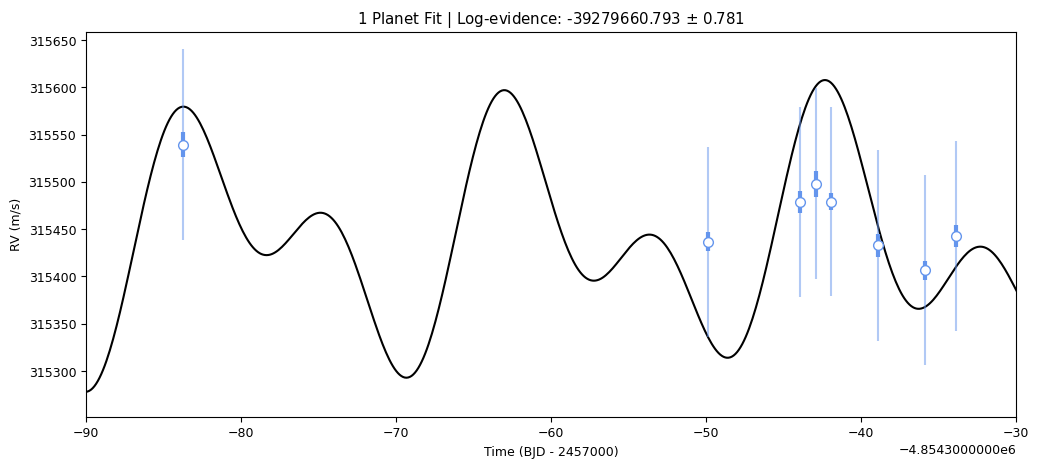

In [24]:

# Plot HARPS and FEROS datasets in the same panel. For this, first select any
# of the two and substract the systematic velocity to get the Keplerian signal.
# Let's do it with FEROS. First generate times on which to evaluate the model:
min_time, max_time = np.min(dataset2.times_rv['FIDEOS'])-30,\
                     np.max(dataset2.times_rv['FIDEOS'])+30

model_times = np.linspace(min_time,max_time,1000)

# Now evaluate the model in those times, and substract the systemic-velocity to
# get the Keplerian signal:
keplerian = results2.rv.evaluate('FIDEOS', t = model_times) - \
            np.median(results2.posteriors['posterior_samples']['mu_FIDEOS'])

# Now plot the (systematic-velocity corrected) RVs:
fig = plt.figure(figsize=(12,5))
instruments = ['FIDEOS']
colors = ['cornflowerblue','orangered']
for i in range(len(instruments)):
    instrument = instruments[i]
    # Evaluate the median jitter for the instrument:
    jitter = np.median(results2.posteriors['posterior_samples']['sigma_w_'+instrument])
    # Evaluate the median systemic-velocity:
    mu = np.median(results2.posteriors['posterior_samples']['mu_'+instrument])
    #Plot original data with original errorbars:
    plt.errorbar(dataset2.times_rv[instrument]-2457000,(dataset2.data_rv[instrument]-mu),\
                 yerr = dataset2.errors_rv[instrument],fmt='o',\
                 mec=colors[i], ecolor=colors[i], elinewidth=3, mfc = 'white', \
                 ms = 7, label=instrument, zorder=10)

    # Plot original errorbars + jitter (added in quadrature):
    plt.errorbar(dataset2.times_rv[instrument]-2457000,dataset2.data_rv[instrument]-mu,\
                yerr = np.sqrt(dataset2.errors_rv[instrument]**2+jitter**2),fmt='o',\
                mec=colors[i], ecolor=colors[i], mfc = 'white', label=instrument,\
                alpha = 0.5, zorder=5)

# Plot Keplerian model:
plt.plot(model_times-2457000,keplerian+315440 ,color='black',zorder=1)
plt.ylabel('RV (m/s)')
plt.xlabel('Time (BJD - 2457000)')
plt.title('1 Planet Fit | Log-evidence: {0:.3f} $\pm$ {1:.3f}'.format(results2.posteriors['lnZ'],\
       results2.posteriors['lnZerr']))
plt.xlim([-90-4.8543e6,-30-4.8543e6])
#plt.xlim([-398-4.8543e6,-378-4.8543e6])
#plt.legend()

In [15]:
results.rv.evaluate('FIDEOS', t = model_times) 

array([1.31850570e+02, 1.25524466e+02, 1.19087309e+02, 1.12567025e+02,
       1.05991913e+02, 9.93906486e+01, 9.27920239e+01, 8.62248172e+01,
       7.97176708e+01, 7.32989646e+01, 6.69966931e+01, 6.08383430e+01,
       5.48507730e+01, 4.90600971e+01, 4.34915708e+01, 3.81694030e+01,
       3.31167061e+01, 2.83557050e+01, 2.39071643e+01, 1.97904857e+01,
       1.60236235e+01, 1.26232061e+01, 9.60418786e+00, 6.97939812e+00,
       4.75975638e+00, 2.95504352e+00, 1.57341431e+00, 6.21051076e-01,
       1.02384517e-01, 2.23013780e-02, 3.75895238e-01, 1.16383421e+00,
       2.38266343e+00, 4.02723131e+00, 6.09036526e+00, 8.56306716e+00,
       1.14346078e+01, 1.46927826e+01, 1.83226029e+01, 2.23086311e+01,
       2.66334876e+01, 3.12783101e+01, 3.62229745e+01, 4.14458340e+01,
       4.69240541e+01, 5.26337421e+01, 5.85499960e+01, 6.46470127e+01,
       7.08982009e+01, 7.72762969e+01, 8.37534833e+01, 9.03015107e+01,
       9.68918835e+01, 1.03495930e+02, 1.10084388e+02, 1.16628701e+02,
      

In [14]:
import pickle
objects = []
file_name = "/home/alexandert/Docs_Jupyter/9.Joven_Investigador/Datos_Juliet/fideos_rvs/_dynesty_NS_posteriors.pkl"

with (open(file_name, "rb")) as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break

In [15]:
objects

[{'dynesty_output':          nlive: 300
           niter: 3436
           ncall: array([1, 1, 1, ..., 1, 1, 1])
             eff: 4.392090475182808
         samples: array([[ 1.04630603e+01,  5.96571232e+04,  8.93818496e+01, ...,
           9.03516103e+01,  1.64552238e+01,  2.85580123e-03],
         [ 1.04630180e+01,  5.96571212e+04, -3.35556093e+01, ...,
           2.15887917e-02,  4.51878456e+00,  4.04468598e-03],
         [ 1.04630622e+01,  5.96571205e+04,  9.80448523e+01, ...,
           6.94953128e-03,  1.27436834e-02,  5.49076687e-03],
         ...,
         [ 1.04631964e+01,  5.96571218e+04, -2.01985323e+01, ...,
           3.98852999e-02,  1.68607991e+00,  9.99715392e+01],
         [ 1.04630819e+01,  5.96571231e+04, -2.72530146e+01, ...,
           1.02886000e-01,  4.13686988e+01,  9.97393185e+01],
         [ 1.04629667e+01,  5.96571219e+04,  1.23272586e+01, ...,
           1.01788037e-01,  6.65075823e-01,  9.97247222e+01]])
            blob: array([None, None, None, ..., None,